In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

#匯入訓練資料

In [ ]:
df_num = pd.read_csv('/content/drive/MyDrive/深度學習/traindataset加金門後/00traindata_all-1.csv', index_col = 'ID')
#df = pd.read_csv('/content/drive/MyDrive/深度學習/無預處理data/baseline_traindataset.csv', index_col = 'ID')
#df_num = df_num.drop(['鄉鎮市區路名的embbeding'], axis=1)
df_num

縣市      土地面積  移轉層次  總樓層數  主要用途  主要建材  建物型態         屋齡      建物面積  \
ID                                                                          
TR-1       0 -0.256716    11    11     2     4     0  32.583333 -0.174154   
TR-2       0  0.100134     7    12     2     4     0  24.166667  0.314204   
TR-3       6  0.181921    10    15    11     0     0   6.166667  0.423366   
TR-4       1  0.085594     9    14    11     4     0   8.833333  0.164249   
TR-5       1 -0.938116    41    43     2     5     0  11.000000  0.985839   
...       ..       ...   ...   ...   ...   ...   ...        ...       ...   
TR-11747   5  0.706189     4     5     2     4     1  28.333333 -0.271825   
TR-11748   2 -0.225809     2     7     2     4     2  29.250000 -0.325832   
TR-11749   1 -0.943908    15    17     2     4     0  22.833333 -0.848662   
TR-11750   1 -1.147111    12    16     2     4     0  25.083333 -1.199130   
TR-11751   1 -0.398154    11    27    11     5     0   2.250000  1.217378   

              車位面積  ...  與政府最短距  縣市_區域  與百貨最短距  <0.3公車站數     人口密度    老化指數  \
ID                  ...                                                     
TR-1     -0.819326  ...    2.40     27    2.15        54  9126.87  166.10   
TR-2     -0.819326  ...    6.61     30    3.61        11  9126.87  166.10   
TR-3      0.161624  ...    5.96    126    7.19         5   924.21  161.78   
TR-4      0.524653  ...    5.19     72    4.90         9  1946.61  147.86   
TR-5      0.532377  ...    1.36     73    0.99       109  1946.61  147.86   
...            ...  ...     ...    ...     ...       ...      ...     ...   
TR-11747  0.484488  ...    6.39     94    6.23        26  1868.59  101.89   
TR-11748 -0.819326  ...    1.38     86    1.77        14  4344.33   87.03   
TR-11749 -0.819326  ...   20.86     77   20.51        12  1946.61  147.86   
TR-11750 -0.819326  ...    3.43     70    3.81        32  1946.61  147.86   
TR-11751  0.442779  ...    5.99     66    5.58         2  1946.61  147.86   

          與高鐵最短距      縱坐標     橫坐標      平均收入  
ID                                           
TR-1        4.20  2768378  305266  0.006300  
TR-2        3.53  2767990  300677  0.006300  
TR-3        7.82  2504666  184815  0.004997  
TR-4        4.96  2772355  296653  0.005074  
TR-5        1.21  2768472  297377  0.005074  
...          ...      ...     ...       ...  
TR-11747   12.11  2758675  280165  0.005368  
TR-11748    6.96  2743084  247333  0.006842  
TR-11749   14.76  2773938  316680  0.005074  
TR-11750    3.61  2763966  295794  0.005074  
TR-11751    2.22  2772198  300173  0.005074  

[11751 rows x 45 columns]

In [ ]:
df_num = df_num[df_num['單價'] <8]

#資料分布

In [ ]:
description = df_num.describe()
means = description.loc['mean']
stds = description.loc['std']
for i in range(0, len(df_num.columns)):
  print(df_num.columns[i], means[i], stds[i])


縣市 2.810663486926156 3.0262635854926416
土地面積 0.015551783341075551 1.0661361841397736
移轉層次 7.427902222979303 5.085757070206061
總樓層數 12.591516906566731 6.829581133341229
主要用途 4.198620219742781 3.7453982855644807
主要建材 3.92062004939954 0.6471019055398876
建物型態 0.5772080742696534 0.7847167090840621
屋齡 21.326881583056526 14.428323635879972
建物面積 0.025896117593818768 1.0697597872733364
車位面積 0.017350287446435627 1.0221533964952334
車位個數 0.637254066944894 0.6764513749092025
主建物面積 0.0223759651230109 1.065323515807231
陽台面積 0.02275631336481139 1.0695744348060503
附屬建物面積 0.023485136937570733 1.1780707332285847
單價 1.9855530952553682 0.9654708292666581
經度 121.18299044798934 0.49214337032216615
緯度 24.57751409717018 0.8375528362274736
站點級別 2.2217017289839025 1.0870113756480757
與大眾交通最短距 1.4789540924963804 1.5628793197155488
與國小最短距 0.5222144621412146 0.31703371560452515
國小總人數 196.11685546375946 116.39959359737493
與國中最短距 0.6990537432927348 0.4420709150801419
國中總人數 324.5565113704114 198.91793993375185
與高中最短距 1

In [ ]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-11-11 03:00:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.211.100, 173.194.211.113, 173.194.211.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.211.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dba3cj0ecepmivjtdl7blmf1k3att0t4/1699671600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c62abb28-8ff7-4348-b158-b74aac57b6e8 [following]
--2023-11-11 03:00:47--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/dba3cj0ecepmivjtdl7blmf1k3att0t4/1699671600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=c62abb28-8ff7-4348-b158-b74aac57b6e8
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to d

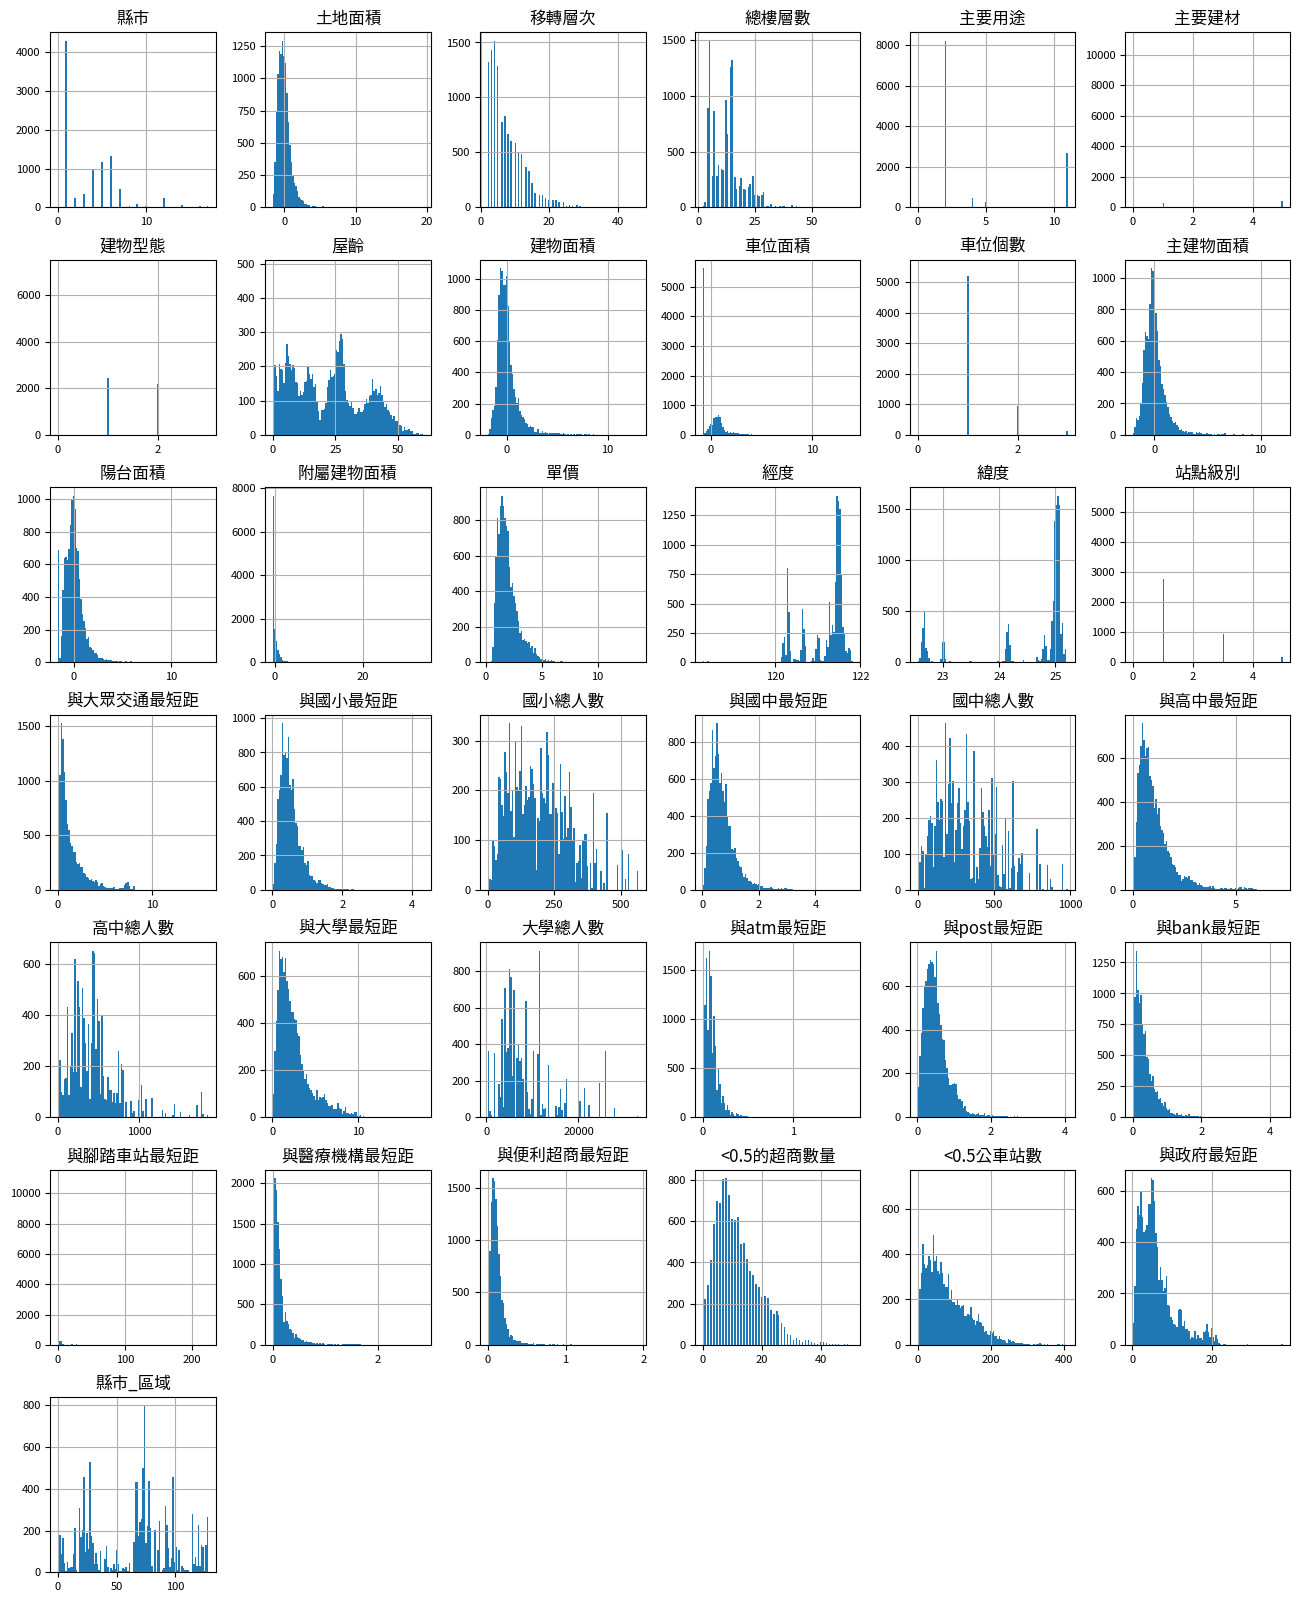

In [ ]:
df_num.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

In [ ]:
#加入token做多模態 效果很差
'''
df_emb = pd.read_csv('/content/drive/MyDrive/深度學習/traindataset加金門後/traindataset_embedding.csv', index_col = 'ID')
df_emb
'''

embedding
ID                                                         
TR-1      [101, 1378, 1266, 2356, 1920, 2128, 1281, 3142...
TR-2      [101, 1378, 1266, 2356, 5857, 5836, 1281, 3717...
TR-3      [101, 7770, 7413, 2356, 7854, 2255, 1281, 1266...
TR-4      [101, 3173, 1266, 2356, 3173, 5800, 1281, 4886...
TR-5      [101, 3173, 1266, 2356, 3352, 3578, 1281, 3152...
...                                                     ...
TR-11747  [101, 3425, 1754, 2356, 1061, 2548, 1281, 792,...
TR-11748  [101, 3173, 5001, 2356, 3173, 5001, 2356, 3346...
TR-11749  [101, 3173, 1266, 2356, 3729, 3632, 1281, 2456...
TR-11750  [101, 3173, 1266, 2356, 1759, 1814, 1281, 2119...
TR-11751  [101, 3173, 1266, 2356, 676, 7028, 1281, 1920,...

[11751 rows x 1 columns]

In [ ]:
'''
df = pd.merge(df_num, df_emb, left_index=True, right_index=True)
df
'''

<Figure size 640x480 with 0 Axes>

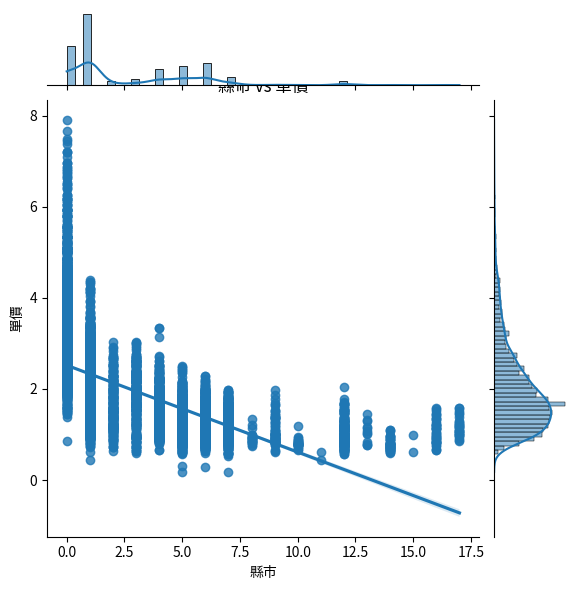

<Figure size 640x480 with 0 Axes>

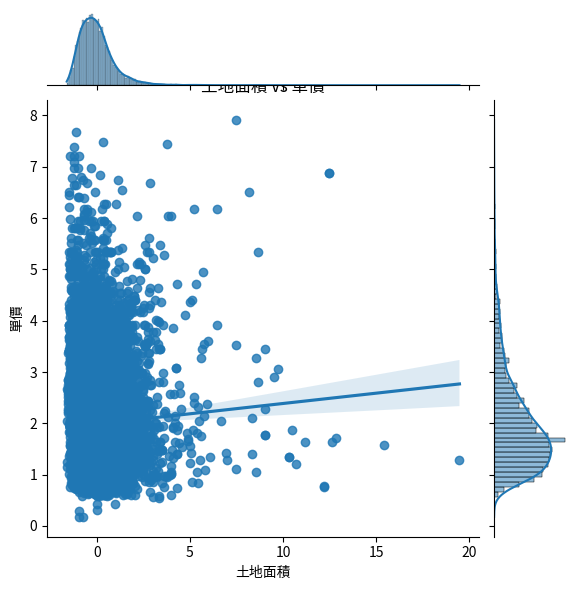

<Figure size 640x480 with 0 Axes>

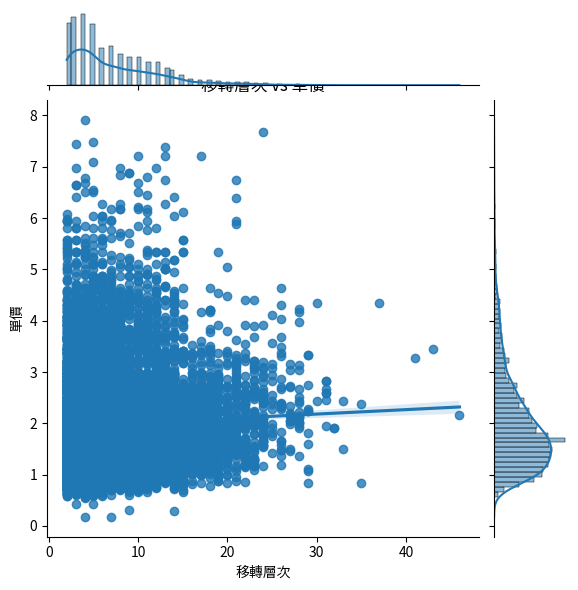

<Figure size 640x480 with 0 Axes>

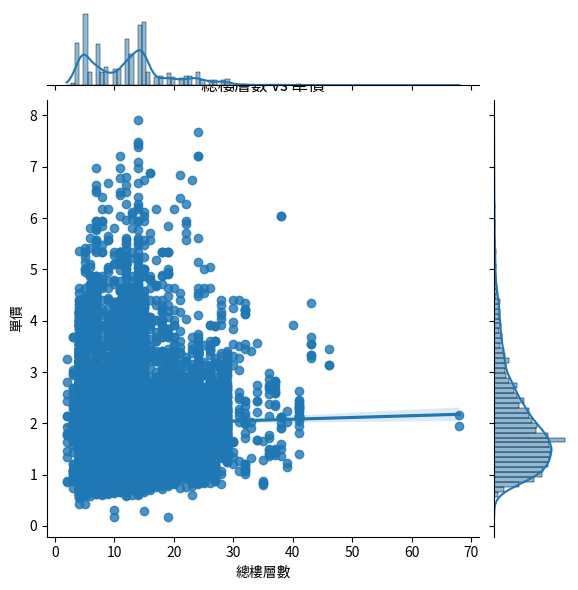

<Figure size 640x480 with 0 Axes>

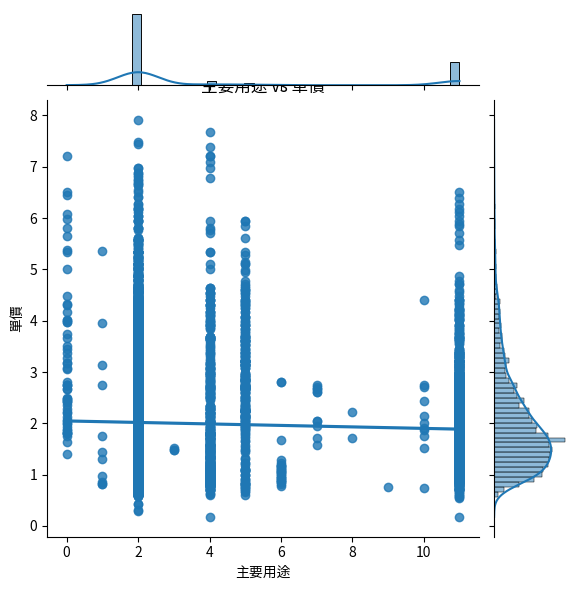

<Figure size 640x480 with 0 Axes>

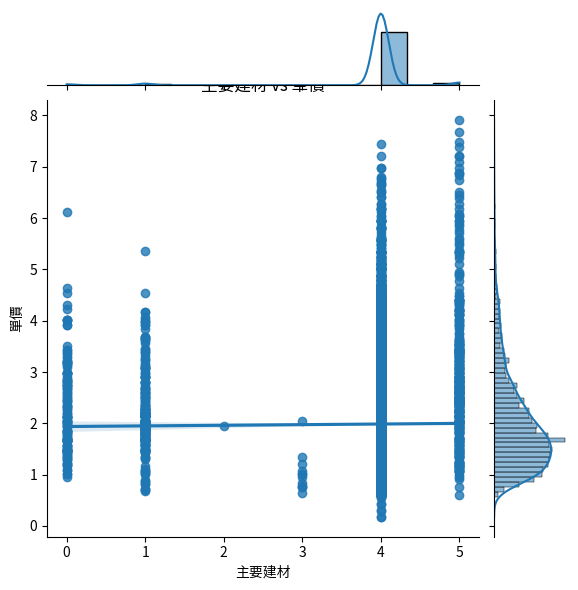

<Figure size 640x480 with 0 Axes>

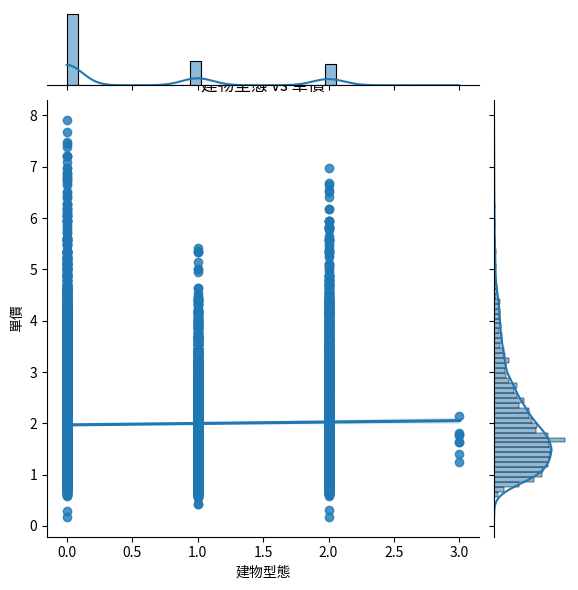

<Figure size 640x480 with 0 Axes>

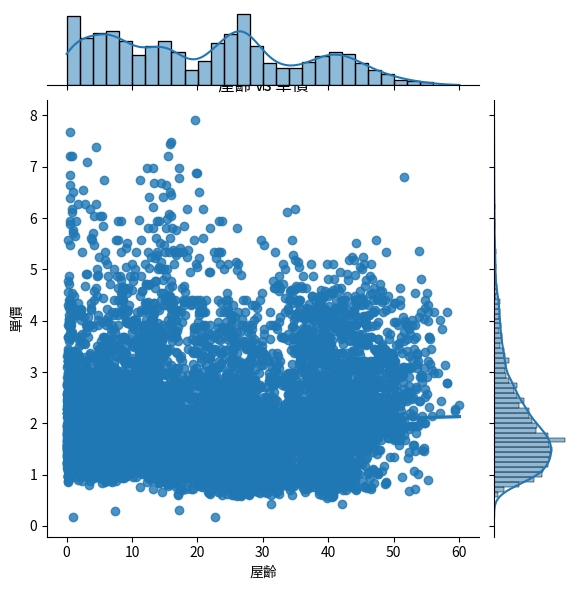

<Figure size 640x480 with 0 Axes>

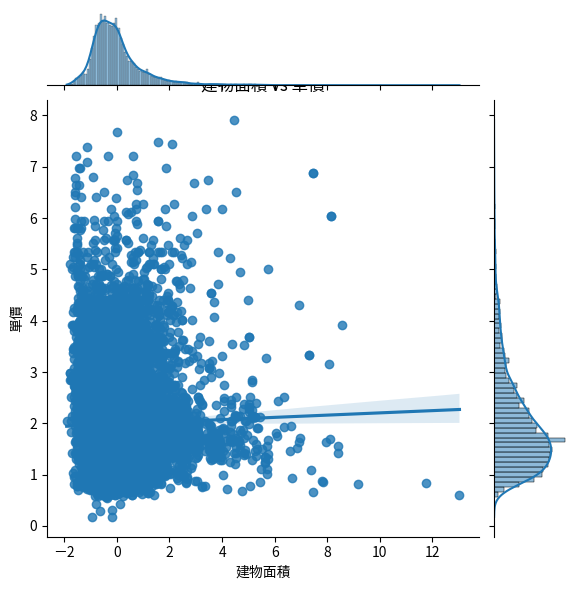

<Figure size 640x480 with 0 Axes>

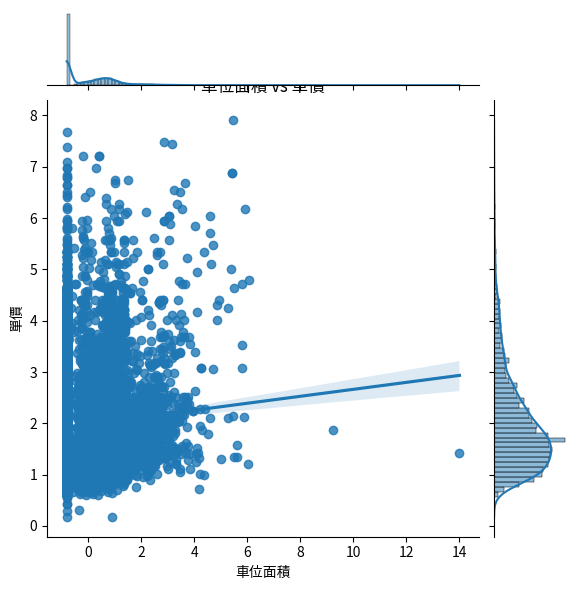

<Figure size 640x480 with 0 Axes>

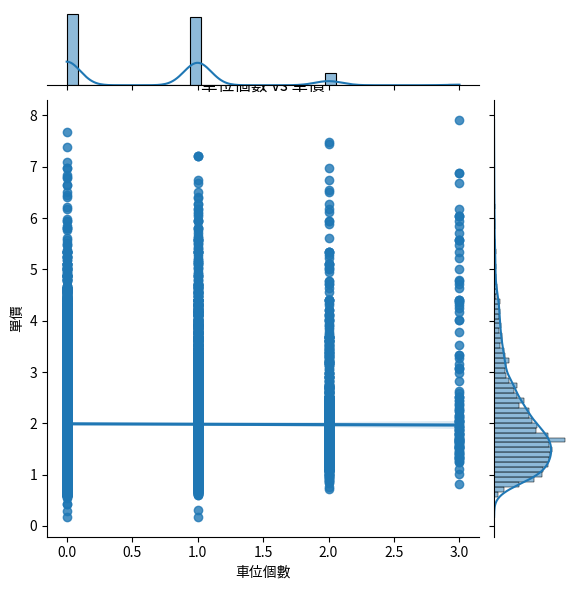

<Figure size 640x480 with 0 Axes>

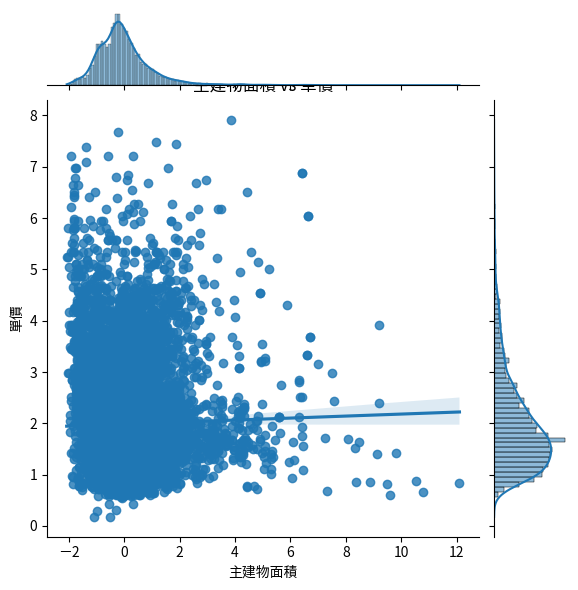

<Figure size 640x480 with 0 Axes>

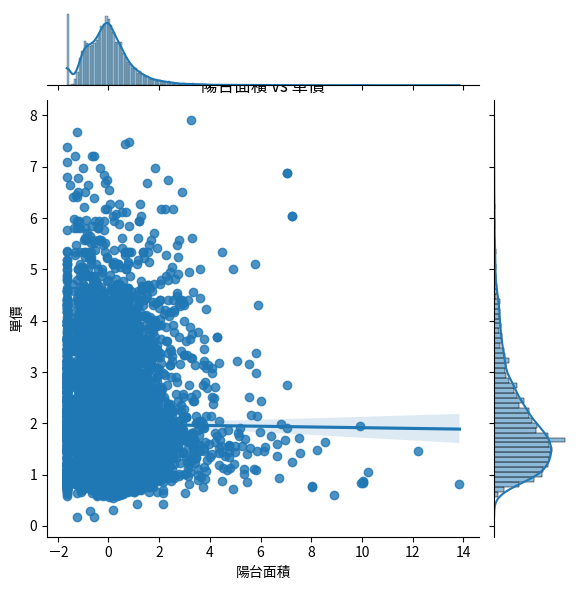

<Figure size 640x480 with 0 Axes>

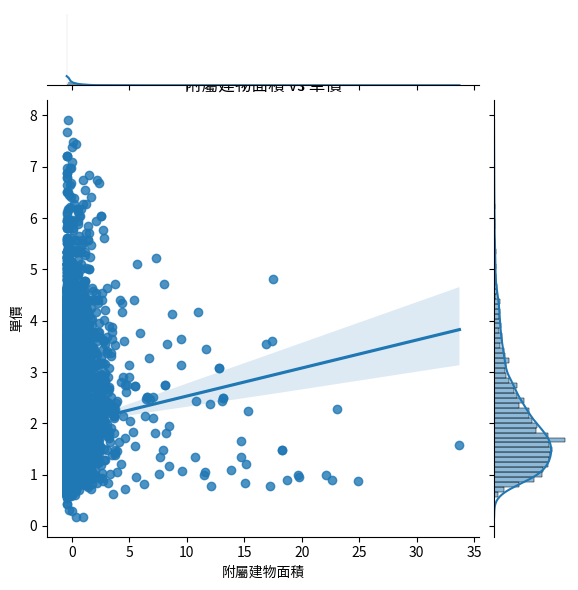

<Figure size 640x480 with 0 Axes>

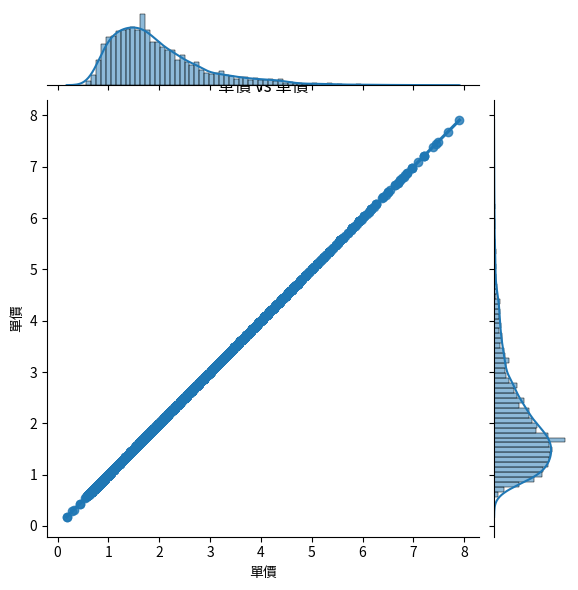

<Figure size 640x480 with 0 Axes>

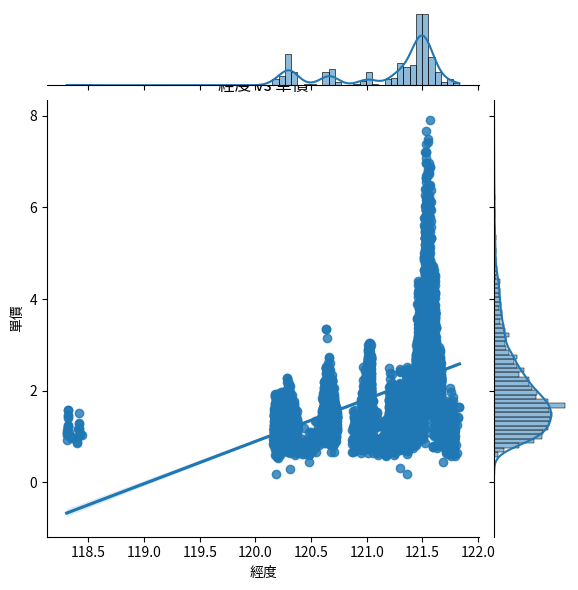

<Figure size 640x480 with 0 Axes>

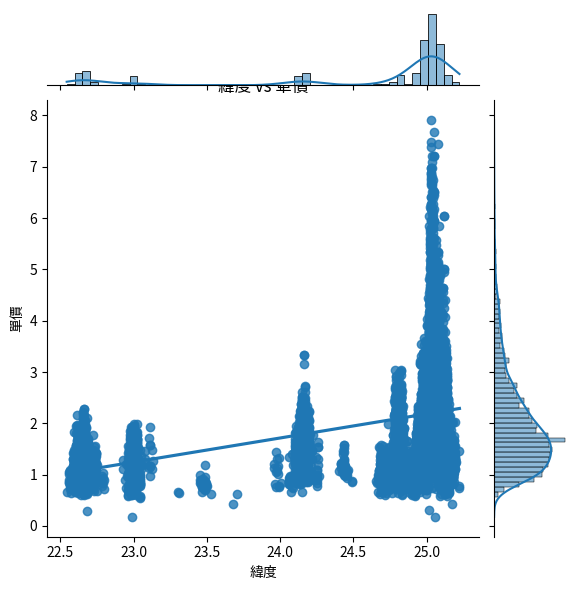

<Figure size 640x480 with 0 Axes>

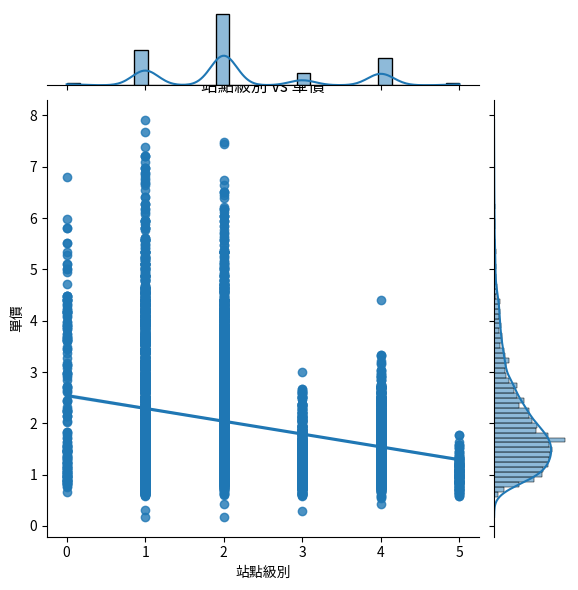

<Figure size 640x480 with 0 Axes>

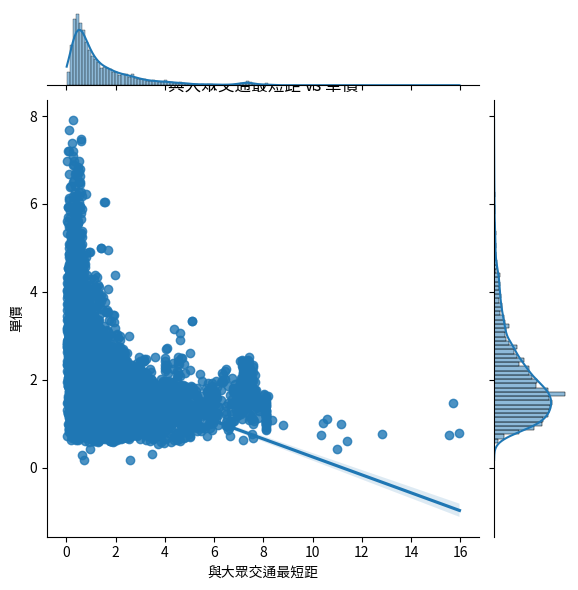

<Figure size 640x480 with 0 Axes>

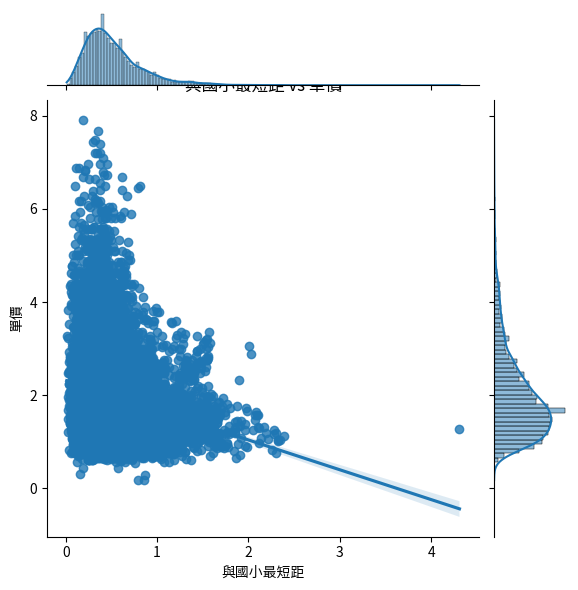

<Figure size 640x480 with 0 Axes>

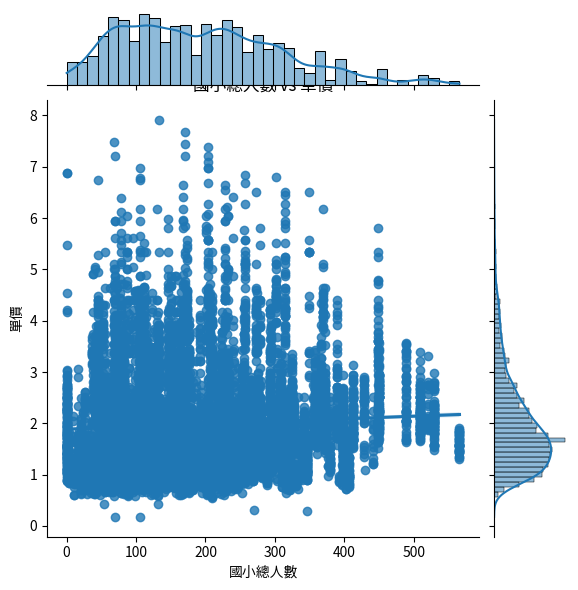

<Figure size 640x480 with 0 Axes>

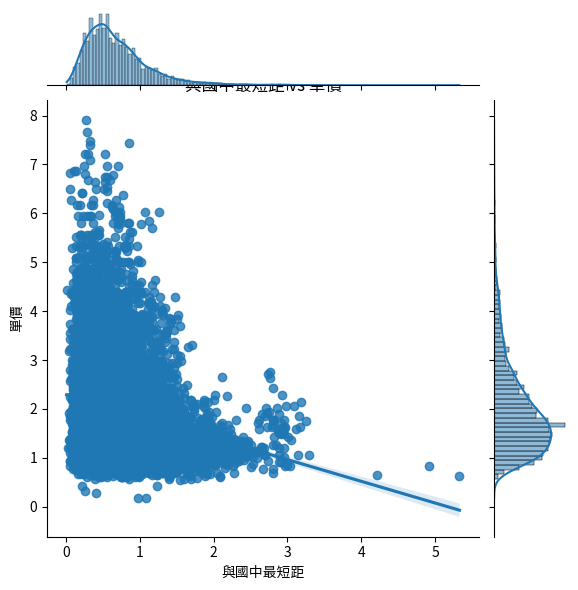

<Figure size 640x480 with 0 Axes>

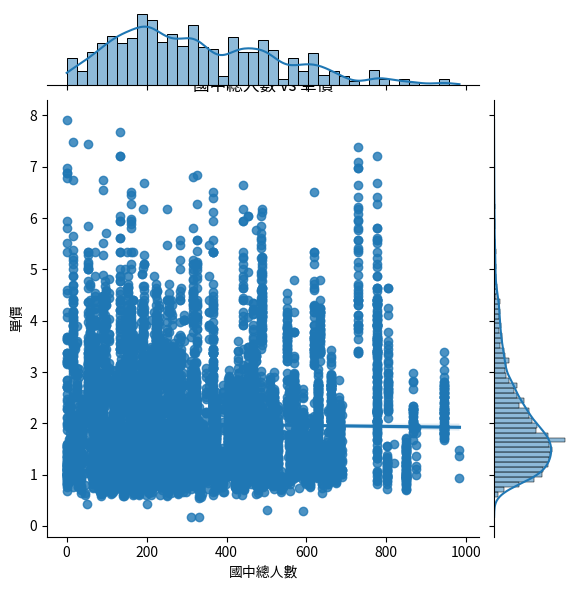

<Figure size 640x480 with 0 Axes>

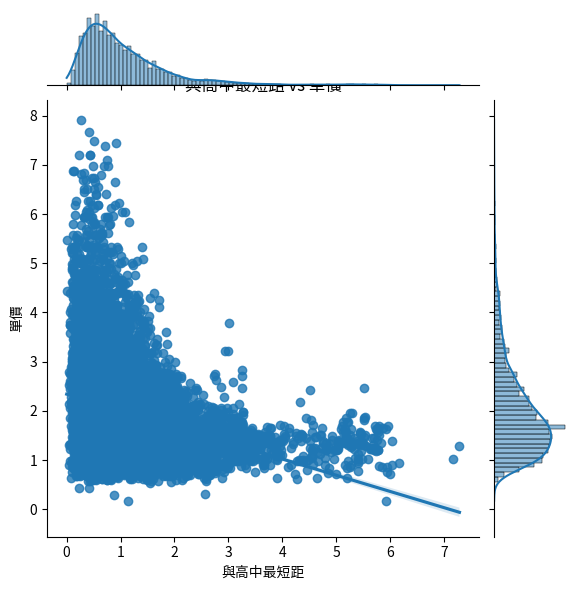

<Figure size 640x480 with 0 Axes>

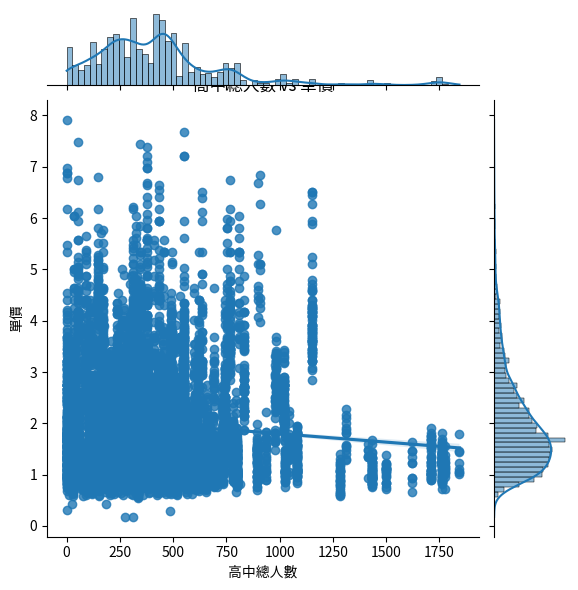

<Figure size 640x480 with 0 Axes>

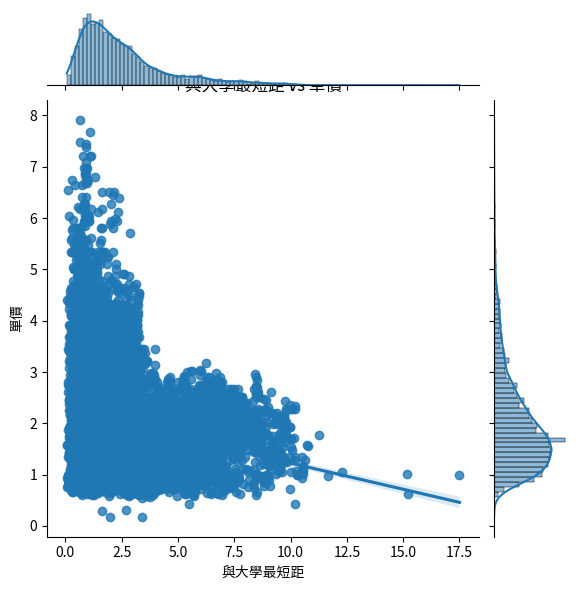

<Figure size 640x480 with 0 Axes>

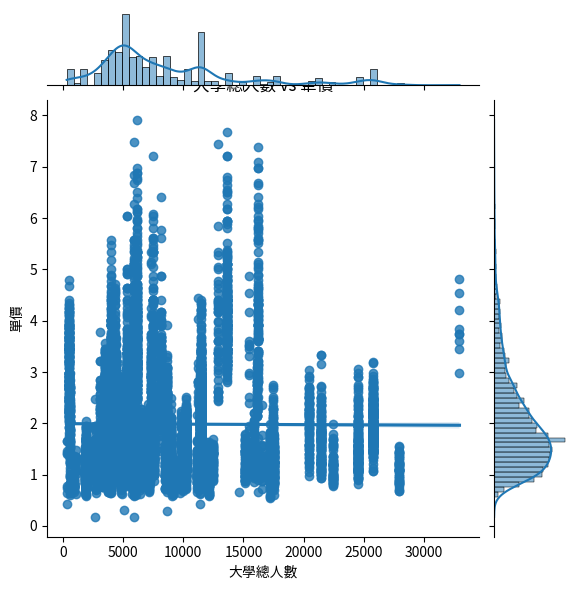

<Figure size 640x480 with 0 Axes>

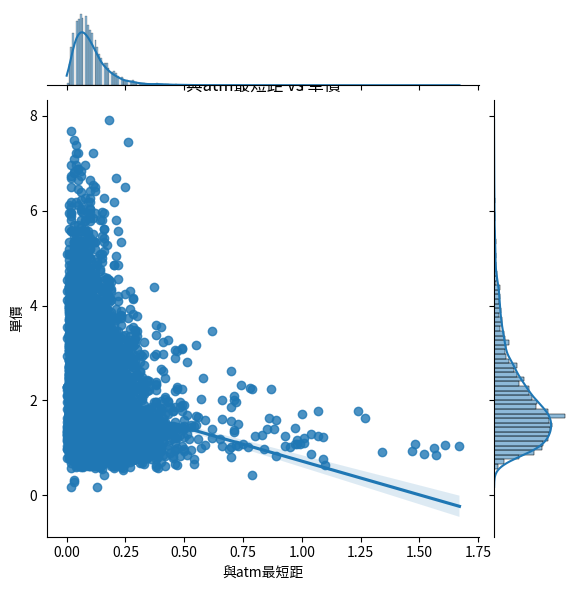

<Figure size 640x480 with 0 Axes>

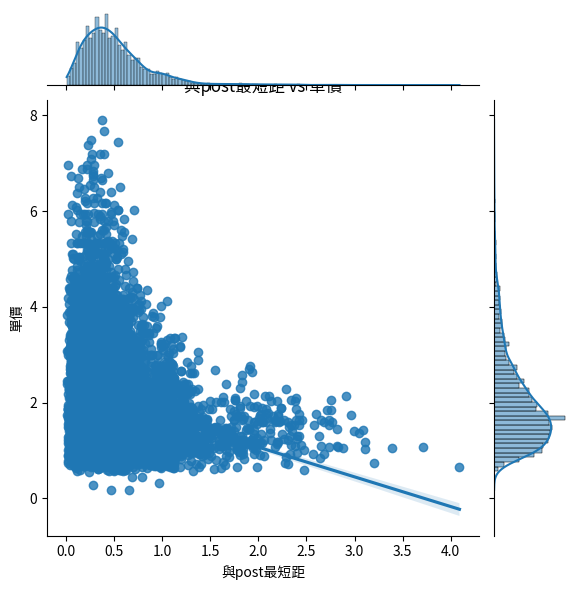

<Figure size 640x480 with 0 Axes>

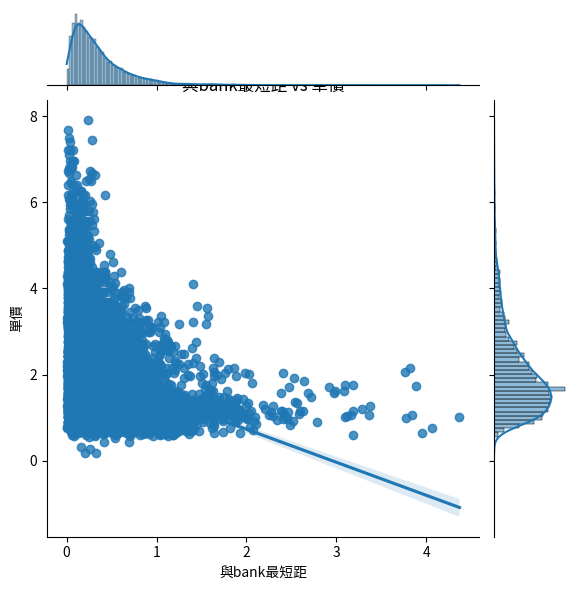

<Figure size 640x480 with 0 Axes>

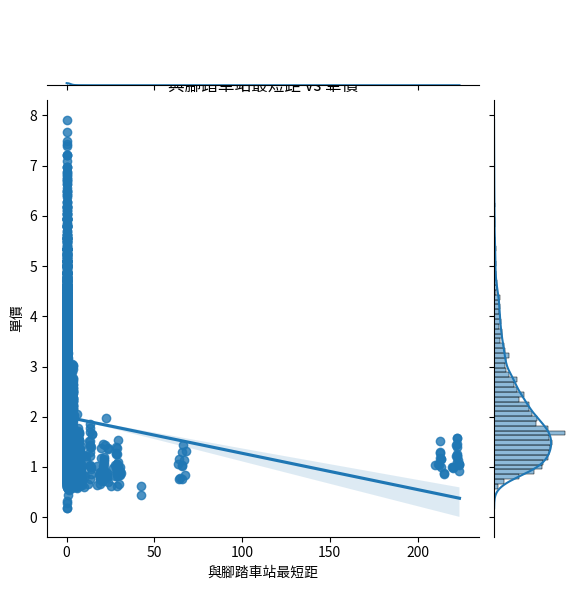

<Figure size 640x480 with 0 Axes>

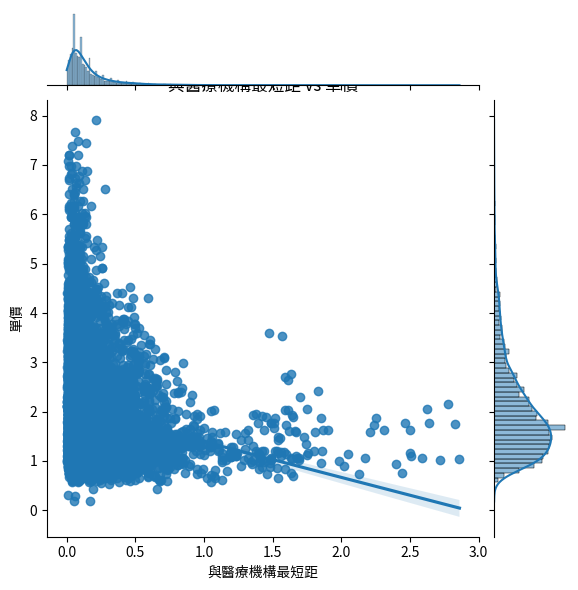

<Figure size 640x480 with 0 Axes>

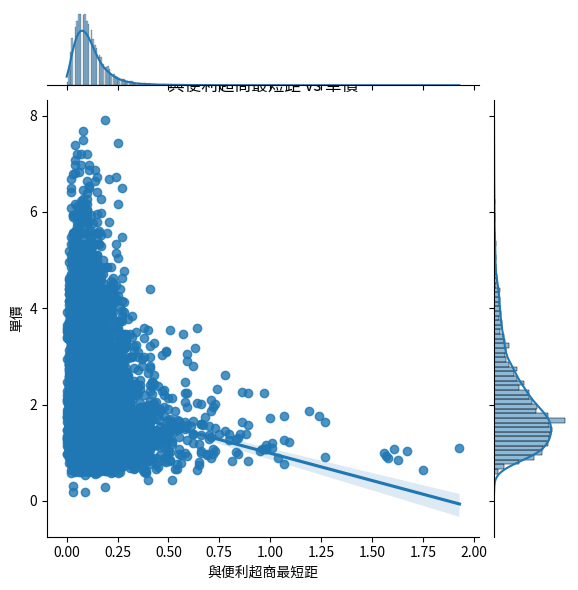

<Figure size 640x480 with 0 Axes>

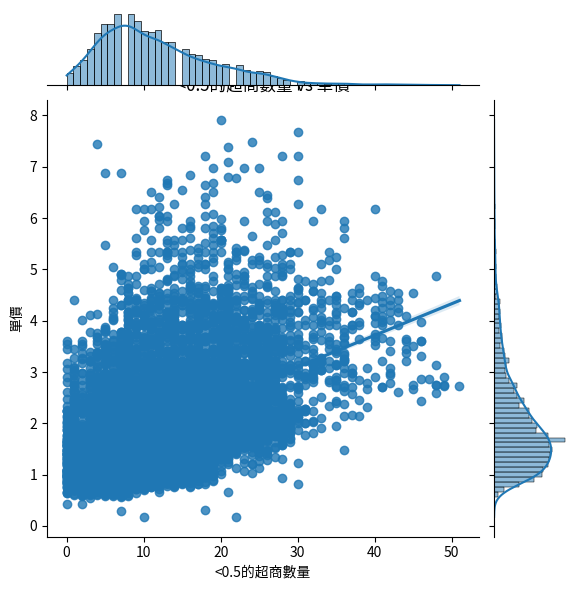

<Figure size 640x480 with 0 Axes>

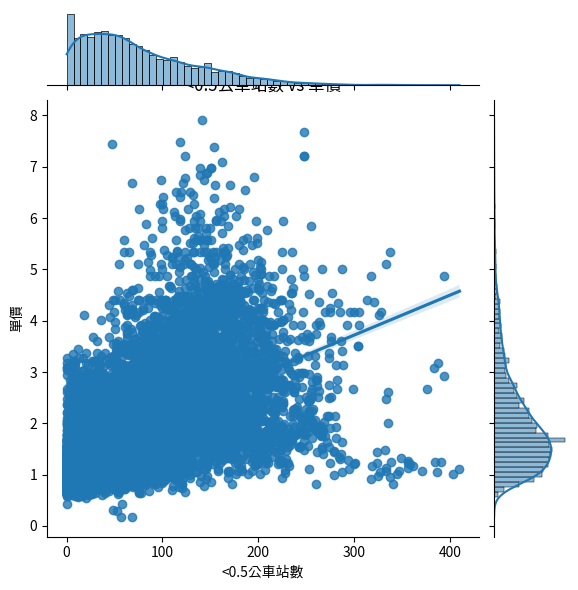

<Figure size 640x480 with 0 Axes>

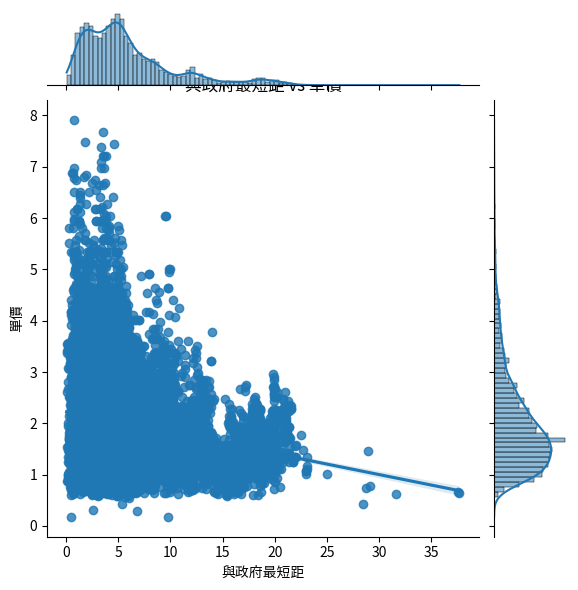

<Figure size 640x480 with 0 Axes>

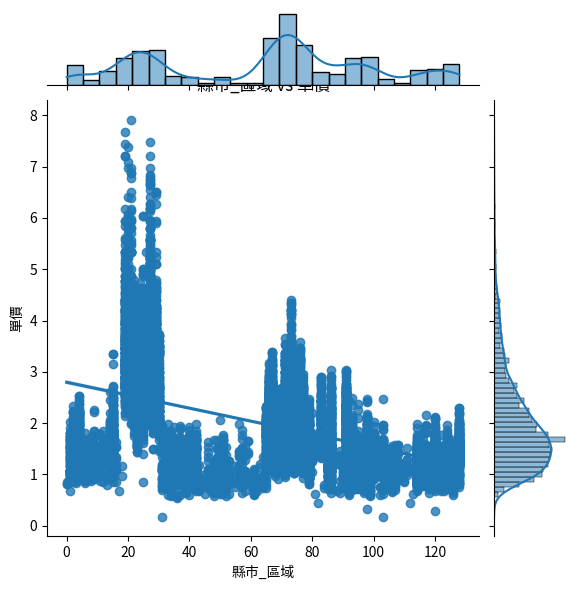

<Figure size 640x480 with 0 Axes>

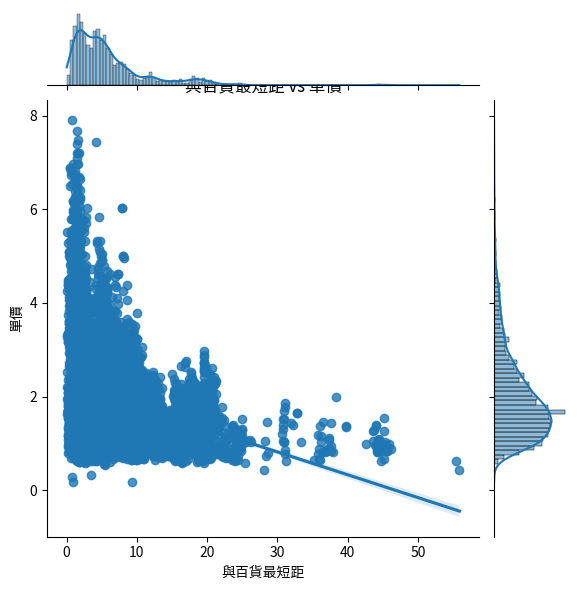

<Figure size 640x480 with 0 Axes>

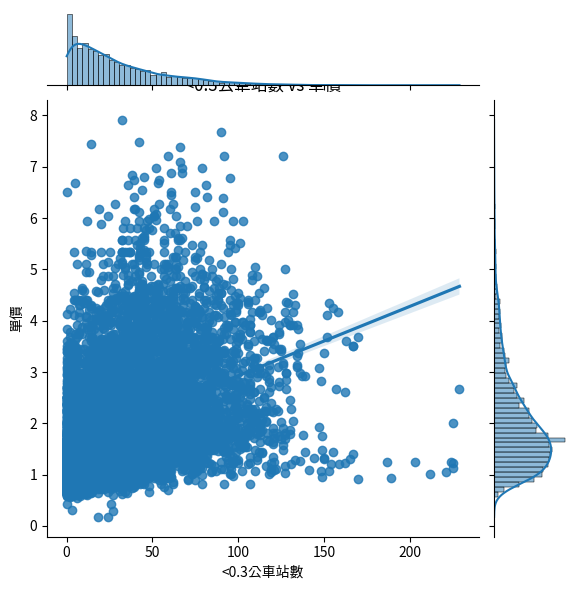

<Figure size 640x480 with 0 Axes>

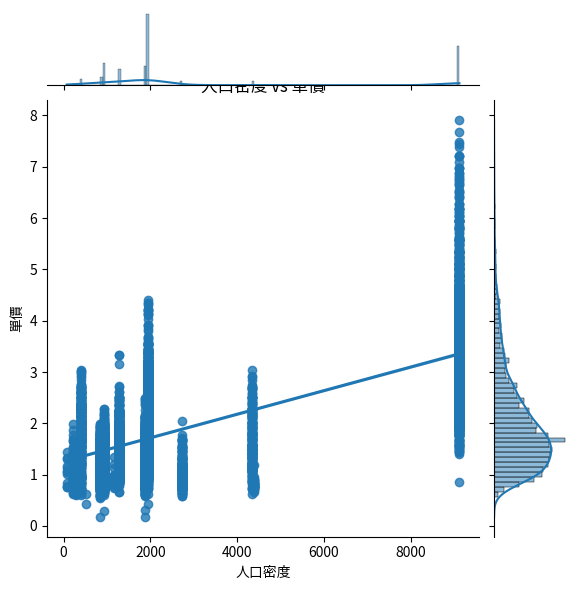

<Figure size 640x480 with 0 Axes>

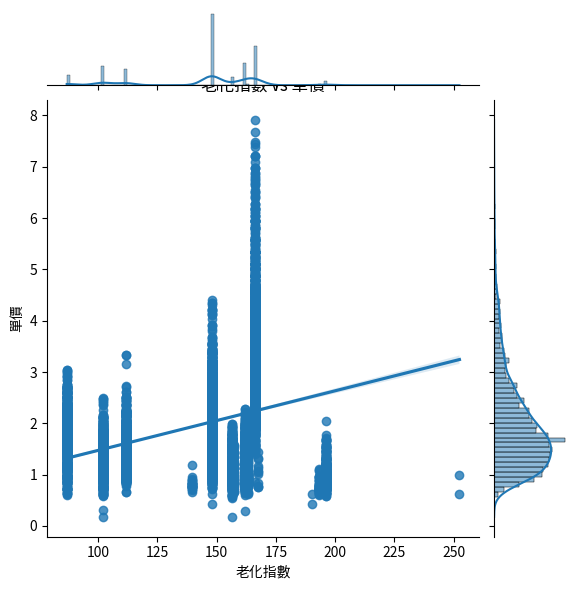

<Figure size 640x480 with 0 Axes>

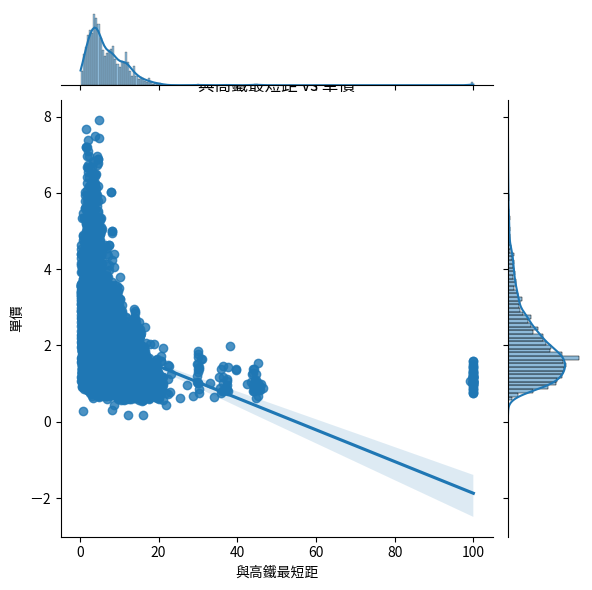

<Figure size 640x480 with 0 Axes>

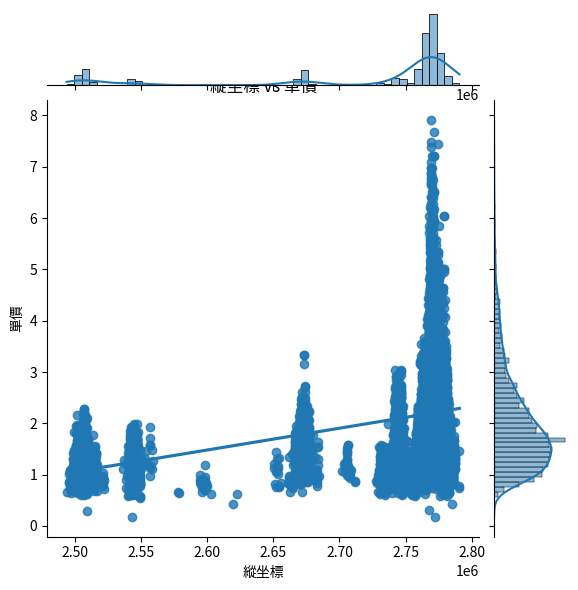

<Figure size 640x480 with 0 Axes>

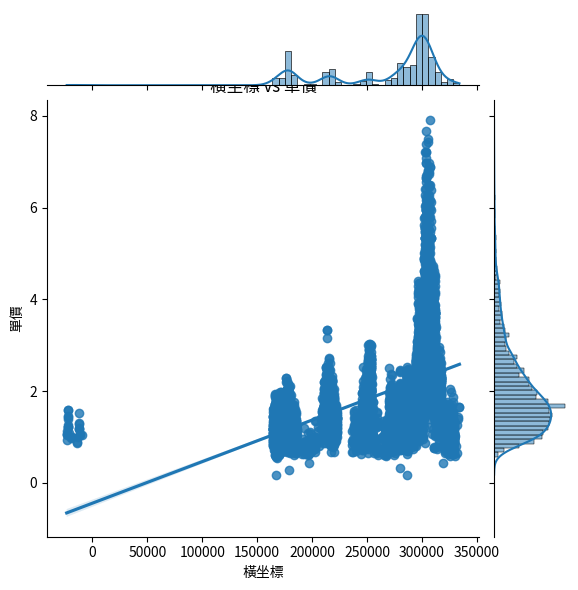

<Figure size 640x480 with 0 Axes>

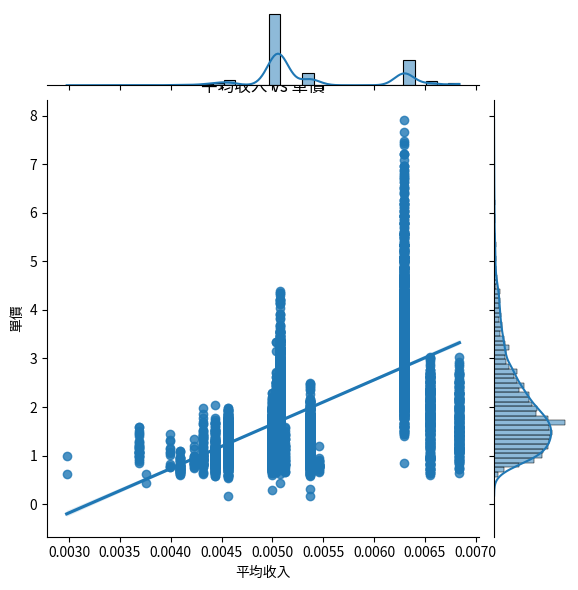

<Figure size 640x480 with 0 Axes>

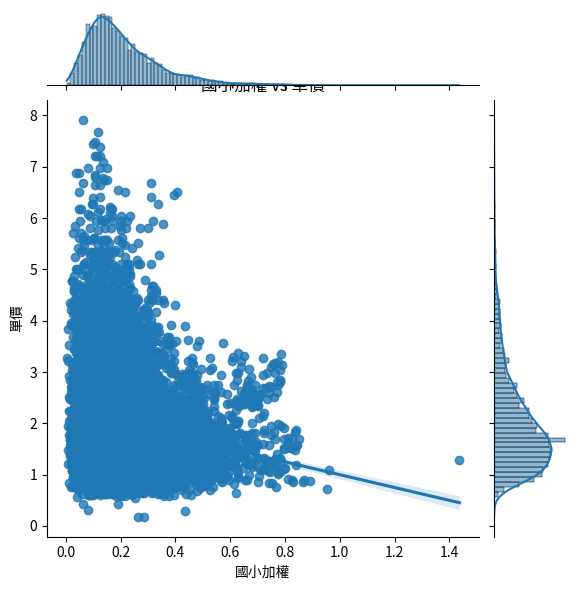

<Figure size 640x480 with 0 Axes>

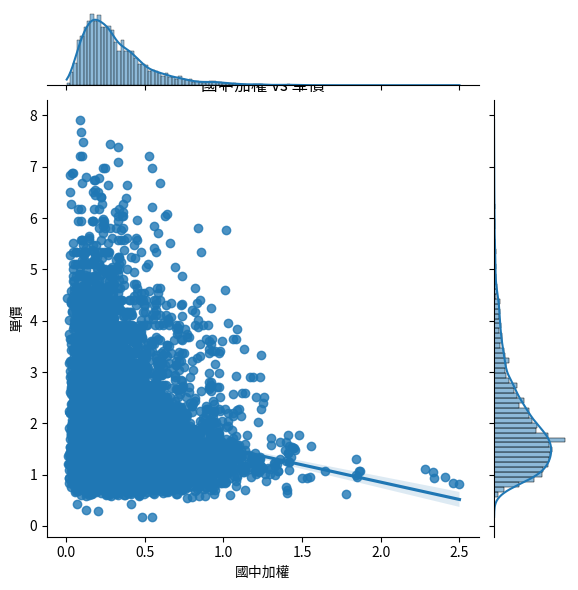

<Figure size 640x480 with 0 Axes>

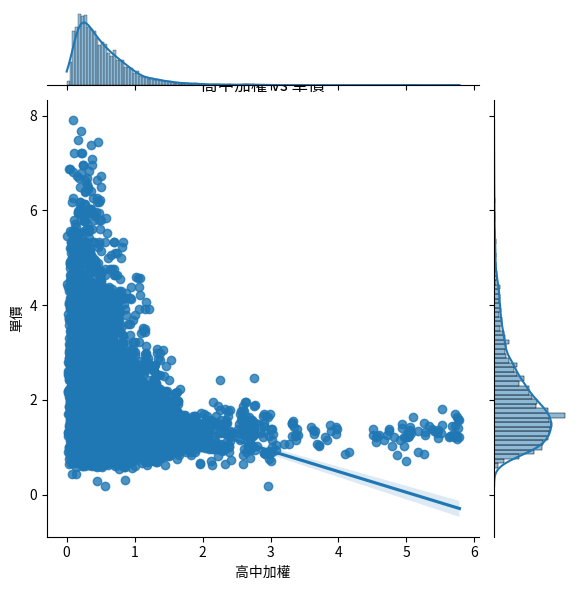

<Figure size 640x480 with 0 Axes>

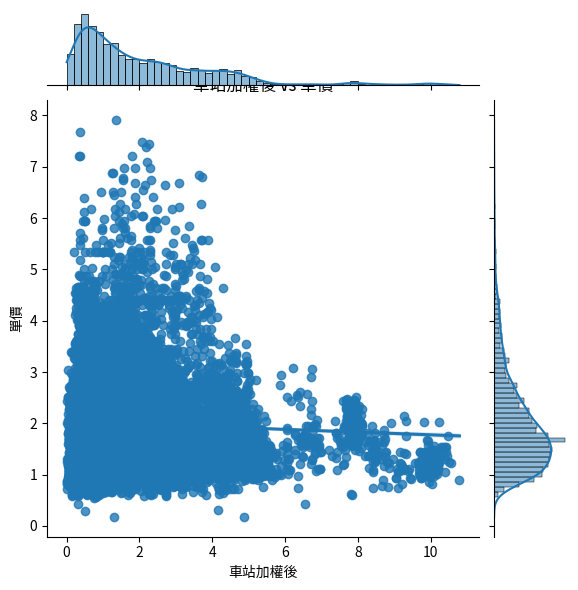

In [ ]:
import seaborn as sns

for i in df_num.columns:
    plt.figure()
    #plt.scatter(df_num1[i],df_num['單價'])
    sns.jointplot(x=df_num[i],y=df_num['單價'], data=df_num, kind="reg")
    plt.ylabel('單價')
    plt.xlabel(i)
    plt.title(f'{i} vs 單價')
    plt.show()

#訓練資料分城市

In [ ]:
def city_traindataset(df, city):
  city_df = df[df['縣市']==city]
  city_df = city_df.reset_index()
  return city_df

In [ ]:
#df_num = df_num_encoded
taipei_df = city_traindataset(df_num, 0)#台北市
newtaipei_df = city_traindataset(df_num, 1)#新北市

'''
taichung_df = city_traindataset(df_num, 4)#台中市
kaohsiung_df = city_traindataset(df_num, 6)#高雄市
tainan_df = city_traindataset(df_num, 7)#台南市
taoyuan_df = city_traindataset(df_num, 5)#桃園市
hsinchu_df = city_traindataset(df_num, 3)#新竹縣
hsinchus_df = city_traindataset(df_num, 2)#新竹市

keelong_df = city_traindataset(df_num, 12) #基隆市
miaoli_df = city_traindataset(df_num, 16) #苗栗縣
chunhua_df = city_traindataset(df_num, 8)#彰化縣
yuinlin_df = city_traindataset(df_num, 11)#雲林縣
chiayi_df = city_traindataset(df_num, 15) #嘉義縣
chiayis_df = city_traindataset(df_num, 10)#嘉義市
pingtung_df = city_traindataset(df_num, 14)#屏東縣
hualien_df = city_traindataset(df_num, 13)#花蓮縣
yilan_df = city_traindataset(df_num, 9)#宜蘭縣
kimen_df = city_traindataset(df_num, 17)#金門縣
'''
north_df = pd.concat([taipei_df,newtaipei_df]).sort_index()
#mid_df = pd.concat([keelong_df, taoyuan_df, hsinchu_df, hsinchus_df, miaoli_df,taichung_df, chunhua_df, yuinlin_df]).sort_index()
#south_df = pd.concat([chiayi_df,chiayis_df, tainan_df, kaohsiung_df, pingtung_df]).sort_index()
#other_df = pd.concat([hualien_df,yilan_df, kimen_df]).sort_index()
#o = pd.concat([mid_df,south_df,other_df]).sort_index()

def df_process(north_df):
  north_df = north_df.reset_index()
  north_df = north_df.drop(['index'], axis=1)
  north_df = north_df.set_index('ID')
  return north_df
df_1 = df_process(north_df)
df_1

縣市      土地面積  移轉層次  總樓層數  主要用途  主要建材  建物型態         屋齡      建物面積  \
ID                                                                          
TR-1       0 -0.256716    11    11     2     4     0  32.583333 -0.174154   
TR-4       1  0.085594     9    14    11     4     0   8.833333  0.164249   
TR-5       1 -0.938116    41    43     2     5     0  11.000000  0.985839   
TR-2       0  0.100134     7    12     2     4     0  24.166667  0.314204   
TR-6       0  0.260510     2    12     2     4     0  39.333333 -0.411438   
...       ..       ...   ...   ...   ...   ...   ...        ...       ...   
TR-11741   1 -0.783027     4    12     2     4     0  23.500000  0.276859   
TR-11746   1  1.390665     3    25    11     5     0   1.166667  2.090101   
TR-11749   1 -0.943908    15    17     2     4     0  22.833333 -0.848662   
TR-11750   1 -1.147111    12    16     2     4     0  25.083333 -1.199130   
TR-11751   1 -0.398154    11    27    11     5     0   2.250000  1.217378   

              車位面積  ...  與政府最短距  縣市_區域  與百貨最短距  <0.3公車站數     人口密度    老化指數  \
ID                  ...                                                     
TR-1     -0.819326  ...    2.40     27    2.15        54  9126.87  166.10   
TR-4      0.524653  ...    5.19     72    4.90         9  1946.61  147.86   
TR-5      0.532377  ...    1.36     73    0.99       109  1946.61  147.86   
TR-2     -0.819326  ...    6.61     30    3.61        11  9126.87  166.10   
TR-6     -0.819326  ...    5.78     30    2.82        58  9126.87  166.10   
...            ...  ...     ...    ...     ...       ...      ...     ...   
TR-11741  0.360904  ...    5.03     76    4.80        30  1946.61  147.86   
TR-11746  3.220335  ...    4.21     72    3.93        10  1946.61  147.86   
TR-11749 -0.819326  ...   20.86     77   20.51        12  1946.61  147.86   
TR-11750 -0.819326  ...    3.43     70    3.81        32  1946.61  147.86   
TR-11751  0.442779  ...    5.99     66    5.58         2  1946.61  147.86   

          與高鐵最短距      縱坐標     橫坐標      平均收入  
ID                                           
TR-1        4.20  2768378  305266  0.006300  
TR-4        4.96  2772355  296653  0.005074  
TR-5        1.21  2768472  297377  0.005074  
TR-2        3.53  2767990  300677  0.006300  
TR-6        2.73  2768583  301365  0.006300  
...          ...      ...     ...       ...  
TR-11741    4.40  2766811  301941  0.005074  
TR-11746    3.98  2771379  296674  0.005074  
TR-11749   14.76  2773938  316680  0.005074  
TR-11750    3.61  2763966  295794  0.005074  
TR-11751    2.22  2772198  300173  0.005074  

[6675 rows x 45 columns]

#corr()

covariance >=0.8的欄位:
8 建物面積 1.144288533256425 11 主建物面積 1.1348175308505462
9 車位面積 1.044708578864624 10 車位個數 0.45754748923586597
15 經度 0.24218446795138346 16 緯度 0.701435006027538
15 經度 0.24218446795138346 42 縱坐標 8597585404.11578
15 經度 0.24218446795138346 43 橫坐標 2506679866.327931
16 緯度 0.701435006027538 42 縱坐標 8597585404.11578
16 緯度 0.701435006027538 43 橫坐標 2506679866.327931
27 與atm最短距 0.010018414300283943 32 與便利超商最短距 0.011411020438787856
34 <0.5公車站數 3790.4598260495327 38 <0.3公車站數 790.0044886554064
42 縱坐標 8597585404.11578 43 橫坐標 2506679866.327931


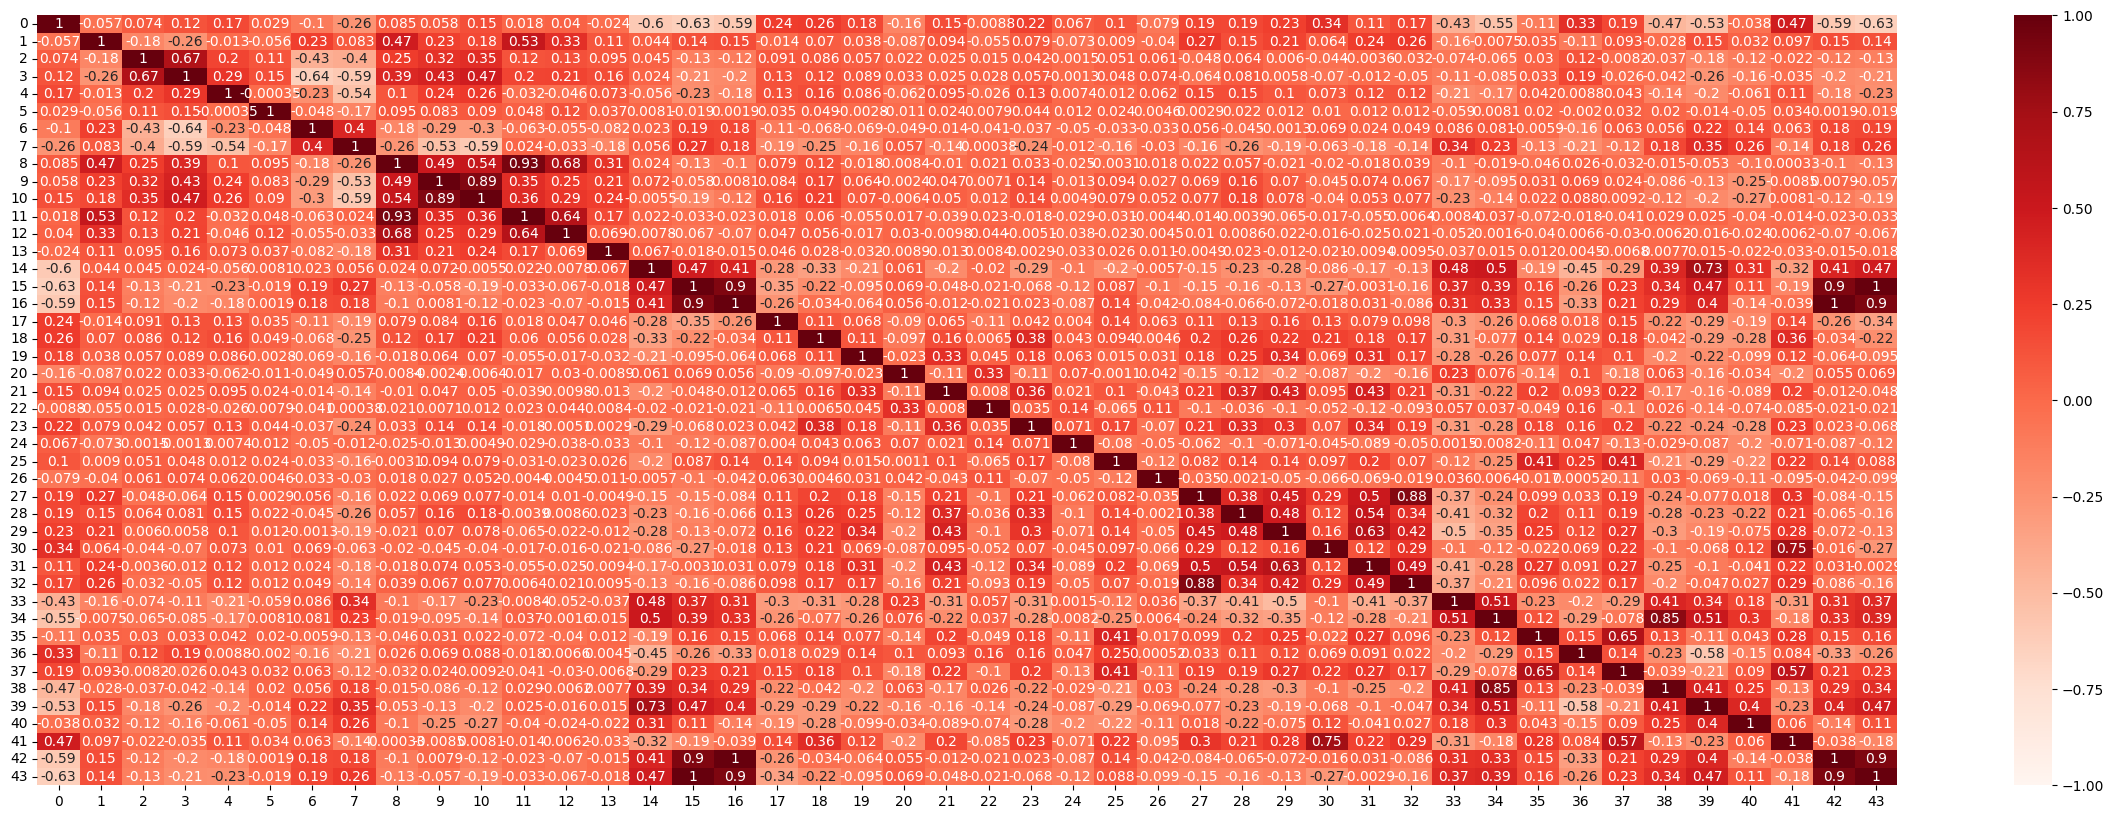

In [ ]:
from sklearn.feature_selection import VarianceThreshold
#variance門檻值不知要設多少
import seaborn as sns
import matplotlib.pyplot as plt

def corr_function(df):
  vt = VarianceThreshold(threshold=1e-08)
  ss_variance = vt.fit_transform(df)
  ss_cor = pd.DataFrame(ss_variance)
  ss_cor = ss_cor.corr()
  x = np.array(df)
  xvar = x.var(axis=0)
  #print(' correlation:\n', ss_cor)
  print('covariance >=0.8的欄位:')
  for i in range(0, len(ss_variance[0])):
    for j in range(i, len(ss_variance[0])):
        if ss_cor[i][j] >=0.8 and ss_cor[i][j]<1:
            print(ss_cor.columns[i], df.columns[i], xvar[i], ss_cor.columns[j], df.columns[j], xvar[j])

  plt.figure(figsize=(30,10))
  sns.heatmap(ss_cor, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1)
  plt.show()

corr_function(df_num) #刪除 移轉層次、主建物面積、陽台面積、車位個數、陽台面積、經度

In [ ]:
df_num = df_num.drop(['移轉層次', '主建物面積', '陽台面積', '車位個數', '經度'], axis=1)
df_num

縣市      土地面積  總樓層數  主要用途  主要建材  建物型態         屋齡      建物面積      車位面積  \
ID                                                                              
TR-1       0 -0.256716    11     2     4     0  32.583333 -0.174154 -0.819326   
TR-629    17  2.076847     3    11     4     1   5.666667 -0.574032 -0.819326   
TR-44     16  0.140799    13    11     4     0   4.916667 -0.339621 -0.819326   
TR-3       6  0.181921    15    11     0     0   6.166667  0.423366  0.161624   
TR-4       1  0.085594    14    11     4     0   8.833333  0.164249  0.524653   
...       ..       ...   ...   ...   ...   ...        ...       ...       ...   
TR-11741   1 -0.783027    12     2     4     0  23.500000  0.276859  0.360904   
TR-11746   1  1.390665    25    11     5     0   1.166667  2.090101  3.220335   
TR-11749   1 -0.943908    17     2     4     0  22.833333 -0.848662 -0.819326   
TR-11750   1 -1.147111    16     2     4     0  25.083333 -1.199130 -0.819326   
TR-11751   1 -0.398154    27    11     5     0   2.250000  1.217378  0.442779   

            附屬建物面積        單價         緯度     車站加權後      國小加權      國中加權   高中加權  
ID                                                                            
TR-1     -0.438452  4.627714  25.022469  4.300000  0.073333  0.116667  0.175  
TR-629    0.174335  1.044041  24.455425  1.348333  0.080000  0.716667  1.200  
TR-44    -0.438452  1.058094  24.702407  1.280000  0.223333  0.620000  0.800  
TR-3      1.525881  1.489072  22.640966  0.899167  0.096667  0.755000  0.560  
TR-4      0.231984  2.051217  25.058663  2.581667  0.370000  0.285000  0.735  
...            ...       ...        ...       ...       ...       ...    ...  
TR-11741 -0.438452  2.379135  25.008440  2.900000  0.305000  0.335000  0.335  
TR-11746  1.143690  2.613362  25.049851  2.035000  0.163333  0.320000  0.440  
TR-11749 -0.171559  2.144908  25.072204  1.740000  0.283333  0.213333  0.355  
TR-11750 -0.438452  2.285444  24.982953  0.690667  0.345000  0.600000  0.240  
TR-11751 -0.438452  2.660207  25.057133  3.123333  0.036667  0.213333  0.320  

[11751 rows x 16 columns]

#標準化

In [ ]:
df =  df_num #沒分城市
#df = df_1 #有分城市

In [ ]:
#0, 4, 5, 6, 10, 14-19是類別資料以及加權數值
column_names = df.columns
column_indices = range(len(column_names))

for idx, name in zip(column_indices, column_names):
    print(f"{idx}: {name}")

0: 縣市
1: 土地面積
2: 移轉層次
3: 總樓層數
4: 主要用途
5: 主要建材
6: 建物型態
7: 屋齡
8: 建物面積
9: 車位面積
10: 車位個數
11: 主建物面積
12: 陽台面積
13: 附屬建物面積
14: 單價
15: 經度
16: 緯度
17: 站點級別
18: 與大眾交通最短距
19: 與國小最短距
20: 國小總人數
21: 與國中最短距
22: 國中總人數
23: 與高中最短距
24: 高中總人數
25: 與大學最短距
26: 大學總人數
27: 與atm最短距
28: 與post最短距
29: 與bank最短距
30: 與腳踏車站最短距
31: 與醫療機構最短距
32: 與便利超商最短距
33: <0.5的超商數量
34: <0.5公車站數
35: 與政府最短距
36: 縣市_區域
37: 與百貨最短距
38: <0.3公車站數
39: 人口密度
40: 老化指數
41: 與高鐵最短距
42: 縱坐標
43: 橫坐標
44: 平均收入


In [ ]:
df_num_encoded = df

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


feature_continuous = ['土地面積','建物面積','車位面積','主建物面積', '陽台面積', '附屬建物面積']
'''
#面積、類別、高相關的距離、加權 不做標準化
columns_to_standardize = [
    '移轉層次',
    '總樓層數',
    '屋齡',
    '與大眾交通最短距',
    '與國小最短距',
    # '國小總人數',
    '與國中最短距',
    # '國中總人數',
    '與高中最短距',
    # '高中總人數',
    '與大學最短距',
    # '大學總人數',
    '與atm最短距',
    '與post最短距',
    '與bank最短距',
    '與腳踏車站最短距',
    '與醫療機構最短距',
    '與便利超商最短距',
    '<0.5的超商數量',
    '<0.5公車站數',
    '與政府最短距',
    '與百貨最短距',
    #'<0.3公車站數',
    '人口密度',
    '老化指數',
    '與高鐵最短距',
    '縱坐標',
    '橫坐標',
    '平均收入'
]
'''
columns_to_standardize = feature_continuous
x0 = df_num_encoded[columns_to_standardize].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x0)
df_num_encoded[columns_to_standardize] = x_standardized


print(df_num_encoded)

          縣市      土地面積  移轉層次  總樓層數  主要用途  主要建材  建物型態         屋齡      建物面積  \
ID                                                                          
TR-1       0 -0.255389    11    11     2     4     0  32.583333 -0.187012   
TR-2       0  0.079339     7    12     2     4     0  24.166667  0.269518   
TR-3       6  0.156055    10    15    11     0     0   6.166667  0.371566   
TR-4       1  0.065700     9    14    11     4     0   8.833333  0.129337   
TR-5       1 -0.894546    41    43     2     5     0  11.000000  0.897383   
...       ..       ...   ...   ...   ...   ...   ...        ...       ...   
TR-11747   5  0.647822     4     5     2     4     1  28.333333 -0.278319   
TR-11748   2 -0.226398     2     7     2     4     2  29.250000 -0.328806   
TR-11749   1 -0.899979    15    17     2     4     0  22.833333 -0.817562   
TR-11750   1 -1.090586    12    16     2     4     0  25.083333 -1.145190   
TR-11751   1 -0.388058    11    27    11     5     0   2.250000  1.113832   

<ipython-input-37-75a420ba12cd>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_encoded[columns_to_standardize] = x_standardized


In [ ]:
#df_num_encoded = df_num_encoded.drop(['縣市','<0.5公車站數','主要用途_11','縣市_區域_123','縣市_區域_124','縣市_區域_125','縣市_區域_126','縣市_區域_127','縣市_區域_128'], axis=1)
#df_num_encoded = df_num_encoded.drop(['縣市_區域','<0.3公車站數', '主要建材','主要用途','建物型態','國小總人數', '國中總人數','高中總人數', '大學總人數','縱坐標', '橫坐標'], axis=1) #基本的拿掉
#df_num_encoded = df_num_encoded.drop(['縣市','土地面積','<0.5公車站數','主要建材','經度','緯度','站點級別','國小總人數','國中總人數','高中總人數','與高中最短距','與大學最短距','大學總人數','與atm最短距','與post最短距','與bank最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距','<0.5的超商數量','與政府最短距','老化指數'], axis=1) #result6
#df_num_encoded = df_num_encoded.drop(['縣市','土地面積','<0.3公車站數','主要建材','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與bank最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距','老化指數'], axis=1) #result7
#df_num_encoded = df_num_encoded.drop(['縣市','土地面積','<0.3公車站數','主要建材','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距'], axis=1) #result8
#df_num_encoded = df_num_encoded.drop(['縣市','<0.3公車站數','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與腳踏車站最短距','與便利超商最短距'], axis=1) #result9
#df_num_encoded = df_num_encoded.drop(['主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.3公車站數', '老化指數', '縱坐標', '橫坐標'], axis=1)
#df_num_encoded = df_num_encoded.drop(['縣市_區域','移轉層次', '總樓層數', '主要用途', '主要建材', '屋齡','建物面積', '建物型態','車位個數','陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標'], axis=1)#把斜率平的刪掉
#df_num_encoded = df_num_encoded.drop(['縣市_區域','移轉層次', '總樓層數', '屋齡','建物面積','車位個數','陽台面積','國小總人數', '國中總人數', '大學總人數', '<0.3公車站數', '縱坐標', '橫坐標',
                                      #'經度','緯度','附屬建物面積','土地面積','<0.5公車站數','主建物面積','人口密度','老化指數',
                                      #'主要用途', '主要建材','建物型態'
                                      #], axis=1)#把斜率正的跟平的刪掉
#df_num_encoded = df_num_encoded.drop(['縣市_區域', '主要建材','主要用途','建物型態','國小總人數', '國中總人數', '高中總人數','大學總人數', '<0.3公車站數', '縱坐標', '橫坐標',
                                      #'與atm最短距','與post最短距','與便利超商最短距'], axis=1)#參考學妹的特徵
#df_num_encoded = df_num_encoded.drop(['縣市_區域','<0.3公車站數','國小總人數','與國小最短距', '國中總人數','與國中最短距', '高中總人數','與高中最短距','大學總人數','縱坐標', '橫坐標','車站加權後'], axis=1)#有加權後的
df_num_encoded = df_num_encoded.drop(['單價', '主建物面積', '陽台面積', '主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '老化指數'], axis=1)
df_num_encoded

縣市      土地面積  移轉層次  總樓層數         屋齡      建物面積      車位面積  車位個數  \
ID                                                                        
TR-1       0 -0.255389    11    11  32.583333 -0.187012 -0.818577   0.0   
TR-2       0  0.079339     7    12  24.166667  0.269518 -0.818577   0.0   
TR-3       6  0.156055    10    15   6.166667  0.371566  0.141153   1.0   
TR-4       1  0.065700     9    14   8.833333  0.129337  0.496329   1.0   
TR-5       1 -0.894546    41    43  11.000000  0.897383  0.503886   1.0   
...       ..       ...   ...   ...        ...       ...       ...   ...   
TR-11747   5  0.647822     4     5  28.333333 -0.278319  0.457033   1.0   
TR-11748   2 -0.226398     2     7  29.250000 -0.328806 -0.818577   0.0   
TR-11749   1 -0.899979    15    17  22.833333 -0.817562 -0.818577   0.0   
TR-11750   1 -1.090586    12    16  25.083333 -1.145190 -0.818577   0.0   
TR-11751   1 -0.388058    11    27   2.250000  1.113832  0.416226   1.0   

            附屬建物面積          經度  ...  <0.5的超商數量  <0.5公車站數  與政府最短距  與百貨最短距  \
ID                              ...                                        
TR-1     -0.392130  121.547608  ...         16       177    2.40    2.15   
TR-2     -0.392130  121.502124  ...          9        71    6.61    3.61   
TR-3      1.275356  120.365799  ...          9        18    5.96    7.19   
TR-4      0.176990  121.462402  ...          9        52    5.19    4.90   
TR-5     -0.392130  121.469444  ...         33       167    1.36    0.99   
...            ...         ...  ...        ...       ...     ...     ...   
TR-11747 -0.165569  121.298684  ...          6        63    6.39    6.23   
TR-11748 -0.158319  120.973622  ...          6        34    1.38    1.77   
TR-11749 -0.165569  121.660968  ...         12        71   20.86   20.51   
TR-11750 -0.392130  121.453610  ...         13        72    3.43    3.81   
TR-11751 -0.392130  121.497284  ...         12        12    5.99    5.58   

          <0.3公車站數     人口密度  與高鐵最短距      縱坐標     橫坐標      平均收入  
ID                                                              
TR-1            54  9126.87    4.20  2768378  305266  0.006300  
TR-2            11  9126.87    3.53  2767990  300677  0.006300  
TR-3             5   924.21    7.82  2504666  184815  0.004997  
TR-4             9  1946.61    4.96  2772355  296653  0.005074  
TR-5           109  1946.61    1.21  2768472  297377  0.005074  
...            ...      ...     ...      ...     ...       ...  
TR-11747        26  1868.59   12.11  2758675  280165  0.005368  
TR-11748        14  4344.33    6.96  2743084  247333  0.006842  
TR-11749        12  1946.61   14.76  2773938  316680  0.005074  
TR-11750        32  1946.61    3.61  2763966  295794  0.005074  
TR-11751         2  1946.61    2.22  2772198  300173  0.005074  

[11741 rows x 33 columns]

In [ ]:
df = df_num_encoded

In [ ]:
#平均約0, 標準差約1 = 土地面積, 建物型態, 建物面積, 車位面積, 主建物面積, 陽台面積, 附屬建物面積 -->建議使用standarscaler
#min max scaler = 移轉層次, 總樓層數, 屋齡, 車位個數, 經度, 緯度, 車站加權後, 國小加權, 國中加權, 高中加權

In [ ]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#非類別欄位
#corr刪掉了'移轉層次', '主建物面積', '陽台面積', '車位個數', '經度'
columns_to_standardize = ['土地面積', '建物面積', '車位面積', '附屬建物面積']
columns_to_minmax = ['總樓層數', '屋齡', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']

#未用corr()刪掉
#columns_to_standardize = ['土地面積', '建物型態', '建物面積', '車位面積', '主建物面積', '陽台面積', '附屬建物面積']
#columns_to_minmax = ['移轉層次', '總樓層數', '屋齡', '車位個數','經度', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']

#baseline 刪除corr高的、variance低的
#columns_to_standardize = ['土地面積', '總樓層數', '屋齡', '建物面積', '車位面積', '附屬建物面積']

#除了類別全都用standard
#columns_to_standardize = ['土地面積', '移轉層次', '建物面積', '車位面積', '車位個數','主建物面積','陽台面積','附屬建物面積','站點級別','與大眾交通最短距','與國小最短距','國小總人數', '與國中最短距', '國中總人數','與高中最短距','高中總人數', '與大學最短距','大學總人數','與atm最短距','與post最短距','與bank最短距','與醫療機構最短距','與便利超商最短距','總樓層數', '屋齡','經度', '緯度', '<0.5的超商數量','<0.5公車站數','與政府最短距', '與腳踏車站最短距','<0.3公車站數','人口密度','老化指數']

#columns_to_standardize = ['土地面積', '移轉層次', '建物面積', '車位面積', '車位個數','主建物面積','陽台面積','附屬建物面積','站點級別','與大眾交通最短距','與國小最短距','國小總人數', '與國中最短距', '國中總人數','與高中最短距','高中總人數', '與大學最短距','大學總人數','與atm最短距','與post最短距','與bank最短距','與醫療機構最短距','與便利超商最短距']
#columns_to_minmax = ['總樓層數', '屋齡','經度', '緯度', '<0.5的超商數量','<0.5公車站數','與政府最短距', '與腳踏車站最短距']

x1 = df[columns_to_standardize].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x1)
df[columns_to_standardize] = x_standardized


x2 = df[columns_to_minmax].values
mm = MinMaxScaler()
x_minmax = mm.fit_transform(x2)
df[columns_to_minmax] = x_minmax


print(df)
'''

          縣市      土地面積  移轉層次      總樓層數  主要用途  主要建材  建物型態        屋齡      建物面積  \
ID                                                                             
TR-1       0 -0.255389    11  0.136364     2     4     0  0.542302 -0.187012   
TR-629    17  1.933508     3  0.015152    11     4     1  0.094313 -0.560831   
TR-44     16  0.117483     9  0.166667    11     4     0  0.081831 -0.341696   
TR-3       6  0.156055    10  0.196970    11     0     0  0.102635  0.371566   
TR-4       1  0.065700     9  0.181818    11     4     0  0.147018  0.129337   
...       ..       ...   ...       ...   ...   ...   ...       ...       ...   
TR-11741   1 -0.749072     4  0.151515     2     4     0  0.391123  0.234607   
TR-11746   1  1.289865     3  0.348485    11     5     0  0.019417  1.929679   
TR-11749   1 -0.899979    15  0.227273     2     4     0  0.380028 -0.817562   
TR-11750   1 -1.090586    12  0.212121     2     4     0  0.417476 -1.145190   
TR-11751   1 -0.388058    11  0.378788  

<ipython-input-86-6abdc80031b1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_standardize] = x_standardized
<ipython-input-86-6abdc80031b1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_minmax] = x_minmax


In [ ]:
#df.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

In [ ]:
'''
stats = df.describe().loc[['mean', 'std']]
a=0
for col in df.columns:
    mean = stats.loc['mean', col]
    std = stats.loc['std', col]
    print(a,f": {col},Mean: {mean:.4f},Std: {std:.4f}")
    a+=1
'''

In [ ]:
#df.to_csv('/content/drive/MyDrive/深度學習/corr_StandardScaler_minmax_traindataset.csv', index=False)

#one-hot

In [ ]:
'''
df_cat = pd.DataFrame(columns=['縣市','主要用途', '主要建材', '建物型態'])
df_cat['主要用途'] = df['主要用途']
df_cat['主要建材'] = df['主要建材']
df_cat['建物型態'] = df['建物型態']
df_cat['縣市'] = df['縣市']
df_cat
'''

縣市  主要用途  主要建材  建物型態
ID                            
TR-1       0     2     4     0
TR-629    17    11     4     1
TR-44     16    11     4     0
TR-3       6    11     0     0
TR-4       1    11     4     0
...       ..   ...   ...   ...
TR-11741   1     2     4     0
TR-11746   1    11     5     0
TR-11749   1     2     4     0
TR-11750   1     2     4     0
TR-11751   1    11     5     0

[11751 rows x 4 columns]

In [ ]:
for i in range(0,4):
  print(df_cat.columns[i], df_cat[df_cat.columns[i]].unique())

縣市 [ 0 17 16  6  1  2  5  8  9 11 15 10 12 14  7  3 13  4]
主要用途 [ 2 11  4  5  8  6 10  0  3  9  1  7]
主要建材 [4 0 5 1 3 2]
建物型態 [0 1 2 3]


In [ ]:
#改one-hot會變超多維
import tensorflow as tf

a=[]
b=[]
c=[]
city=[]
for i in range(0,len(df_cat)):
  city.append(df_cat['縣市'][i])
  a.append(df_cat['主要用途'][i])
  b.append(df_cat['主要建材'][i])
  c.append(df_cat['建物型態'][i])
city = tf.keras.utils.to_categorical(city)
a = tf.keras.utils.to_categorical(a)
b = tf.keras.utils.to_categorical(b)
c = tf.keras.utils.to_categorical(c)

print(city.shape, city)
print(a.shape, a)
print(b.shape, b)
print(c.shape, c)
'''
df_cat['主要用途'] = a
df_cat['主要建材'] = b
df_cat['建物型態'] = c
df_cat
'''

(11751, 18) [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(11751, 12) [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(11751, 6) [[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
(11751, 4) [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


"\ndf_cat['主要用途'] = a\ndf_cat['主要建材'] = b\ndf_cat['建物型態'] = c\ndf_cat\n"

#模型輸入x、輸出y

In [ ]:
#x = df.drop(['單價','鄉鎮市區路名的embbeding'], axis=1)
x = df.drop(['單價'], axis=1)
x = np.array(x)
print(x.shape)
print(x)

pca

In [ ]:
#效果沒有比較好
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

#pf = PolynomialFeatures(degree=2)
#x_poly = pf.fit_transform(x)

pca = PCA(n_components=9)
x_pca = pca.fit_transform(x)

print('x data pca:\n',x_pca, x_pca.shape)
print('x data pca variance:\n',x_pca.var(axis=0))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x_pca[0,:], x_pca[1,:])
plt.show()

output y

In [ ]:
y = np.array(df['單價'])
print(y.shape, y)

(11741,) [4.6277145  1.88725815 1.48907218 ... 2.14490789 2.28544411 2.66020737]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100, shuffle=True)
#x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=100, shuffle=True)

In [ ]:

print(' x_num:',x_train.shape, x_test.shape, '\n',
      'y_price:',y_train.shape, y_test.shape)


 x_num: (10566, 33) (1175, 33) 
 y_price: (10566,) (1175,)


#MAPE

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

#機器學習

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
models = [('GradientBoostingRegressor',GradientBoostingRegressor(n_estimators=700))]

for name, model in models:
  model.fit(x_train, y_train)
  pred_result = model.predict(x_test)
  #result_mse = mean_absolute_percentage_error(y_test, pred_result)
  result_mape = mape(y_test, pred_result)
  result_r2 = r2_score(y_test, pred_result)
  print("MAPE:", result_mape)
  print("R-squared:", result_r2)
  print("\n")

MAPE: 9.732226729795459
R-squared: 0.9273553945908563




In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=60, max_depth=8, min_child_weight=10, seed=42,
                         subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)
model.fit(x_train, y_train)
pred_result = model.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print("MAPE:", result_mape)
print("R-squared:", result_r2)

MAPE: 9.394609601588186
R-squared: 0.9298512745216091


In [ ]:
model = xgb.XGBRegressor(learning_rate=0.1, n_estimators=60, max_depth=8, min_child_weight=10, seed=42,
                         subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0001, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(DecisionTreeRegressor(), n_estimators=120,random_state=0)

model.fit(x_train, y_train)
pred_result = model.predict(x_test)
#result_mse = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)

集成學習
MAPE: 9.116885276702948
R-squared: 0.9314405008175648


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=75, random_state=42)

model.fit(x_train, y_train)
pred_result = model.predict(x_test)
#result_mape = mean_absolute_percentage_error(y_test, pred_result)
result_mape = mape(y_test, pred_result)
result_r2 = r2_score(y_test, pred_result)
print(name)
print("MAPE:", result_mape)
print("R-squared:", result_r2)

In [ ]:
from sklearn.ensemble import StackingRegressor

name = '集成學習'

estimators = [
    ('XGBRegressor', xgb.XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=40, min_child_weight=5,
                            seed=42, subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)),
    ('BaggingRegressor', BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, random_state=0)),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=100, random_state=42)) ]

'''mine
estimators = [
    ('XGBRegressor', xgb.XGBRegressor(learning_rate=0.1, n_estimators=60, max_depth=8, min_child_weight=10, seed=42,
                             subsample=0.7, colsample_bytree=0.7, gamma=0.0001, reg_alpha=1, reg_lambda=1)),
    ('BaggingRegressor', BaggingRegressor(DecisionTreeRegressor(), n_estimators=110, random_state=0)),
    ('RandomForestRegressor', RandomForestRegressor(n_estimators=75, random_state=42))
]
'''
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stacking_regressor.fit(x_train, y_train)
stacking_predictions = stacking_regressor.predict(x_test)

print(name)
print("Stacking MSE:", mape(y_test, stacking_predictions))
print("R-squared:", r2_score(y_test, stacking_predictions))


集成學習
Stacking MSE: 9.423813142397488
R-squared: 0.929215902102382


#預測public test data

In [ ]:
import pandas as pd
public_df = pd.read_csv('/content/drive/MyDrive/深度學習/cc_public+private.csv', index_col='ID')
#public_df['ID_numeric'] = public_df.index.str.split('-').str[1].astype(int) #取出id的數字 要排序
#public_df = public_df.sort_values(by='ID_numeric')
#public_df = public_df.drop(['Unnamed: 0','Unnamed: 0.2','Unnamed: 0.1','ID_numeric'],axis=1)
#public_df = public_df.drop(['鄉鎮市區路名的embbeding','ID_numeric'],axis=1)
public_df

Unnamed: 0  縣市      土地面積  移轉層次  總樓層數  主要用途  主要建材  建物型態         屋齡  \
ID                                                                           
PU-1              0   1  2.039378     3     7     2     4     2  13.916667   
PU-2              1   1 -0.077786     5     5     2     4     1  40.833333   
PU-3              2   1 -0.555766     2    20    10     4     0   1.333333   
PU-4              3   1 -0.744838     6    16     2     4     0  27.500000   
PU-5              4   0 -0.610923     3     7     2     4     2  40.500000   
...             ...  ..       ...   ...   ...   ...   ...   ...        ...   
PR-5871       11746   6 -0.163249    25    25    10     4     0   1.500000   
PR-5872       11747   0  1.118749     6    17     0     0     0  17.583333   
PR-5873       11748   1 -0.053200    14    14     2     4     0  27.083333   
PR-5874       11749   6 -0.089851     2    15    10     4     0   4.166667   
PR-5875       11750   3  1.475407    10    14     2     4     0   7.916667   

             建物面積  ...  與便利超商最短距  <0.5的超商數量  <0.5公車站數  與政府最短距  縣市_區域  與百貨最短距  \
ID                 ...                                                         
PU-1     0.472202  ...      0.14        6.0     139.0   10.72     69   11.12   
PU-2    -0.546455  ...      0.14       23.0      54.0    6.58     60    6.22   
PU-3     0.124032  ...      0.23       23.0      28.0    1.92     67    1.62   
PU-4    -0.027072  ...      0.01        7.0      94.0    5.53     72    5.51   
PU-5    -0.863600  ...      0.07       24.0     152.0    1.15     20    0.89   
...           ...  ...       ...        ...       ...     ...    ...     ...   
PR-5871  0.170569  ...      0.34        3.0      28.0    4.97    113    8.27   
PR-5872  2.489405  ...      0.06       21.0     165.0    2.02     24    1.85   
PR-5873 -0.166110  ...      0.04       14.0     233.0   11.74     66   11.80   
PR-5874  0.453817  ...      0.28        4.0      14.0    6.68    113    7.83   
PR-5875  1.581061  ...      0.16       10.0       9.0    1.79     80    5.86   

         與高鐵最短距     人口密度    老化指數      平均收入  
ID                                          
PU-1      10.78  1946.61  147.86  0.005074  
PU-2       4.11  1946.61  147.86  0.005074  
PU-3       1.71  1946.61  147.86  0.005074  
PU-4       5.29  1946.61  147.86  0.005074  
PU-5       3.52  9126.87  166.10  0.006300  
...         ...      ...     ...       ...  
PR-5871    9.44   924.21  161.78  0.004997  
PR-5872    2.64  9126.87  166.10  0.006300  
PR-5873   11.52  1946.61  147.86  0.005074  
PR-5874    8.34   924.21  161.78  0.004997  
PR-5875    2.49   406.65   86.71  0.006555  

[11751 rows x 42 columns]

In [ ]:
df_num_encoded = public_df
df_num_encoded = df_num_encoded.drop(['Unnamed: 0'],axis=1)

In [ ]:
#沒有單價
column_names = df_num_encoded.columns
column_indices = range(len(column_names))

for idx, name in zip(column_indices, column_names):
    print(f"{idx}: {name}")

0: 縣市
1: 土地面積
2: 移轉層次
3: 總樓層數
4: 主要用途
5: 主要建材
6: 建物型態
7: 屋齡
8: 建物面積
9: 車位面積
10: 車位個數
11: 主建物面積
12: 陽台面積
13: 附屬建物面積
14: 經度
15: 緯度
16: 站點級別
17: 與大眾交通最短距
18: 與國小最短距
19: 國小總人數
20: 與國中最短距
21: 國中總人數
22: 與高中最短距
23: 高中總人數
24: 與大學最短距
25: 大學總人數
26: 與atm最短距
27: 與post最短距
28: 與bank最短距
29: 與腳踏車站最短距
30: 與醫療機構最短距
31: 與便利超商最短距
32: <0.5的超商數量
33: <0.5公車站數
34: 與政府最短距
35: 縣市_區域
36: 與百貨最短距
37: 與高鐵最短距
38: 人口密度
39: 老化指數
40: 平均收入


In [ ]:
df = df_num_encoded

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

columns_to_standardize = [
    '移轉層次',
    '總樓層數',
    '屋齡',
    #'與大眾交通最短距',
    '與國小最短距',
    # '國小總人數',
    '與國中最短距',
    # '國中總人數',
    '與高中最短距',
    # '高中總人數',
    '與大學最短距',
    # '大學總人數',
    '與atm最短距',
    '與post最短距',
    '與bank最短距',
    '與腳踏車站最短距',
    '與醫療機構最短距',
    '與便利超商最短距',
    '<0.5的超商數量',
    '<0.5公車站數',
    #'與政府最短距',
    #'與百貨最短距',
    '人口密度',
    '老化指數',
    #'與高鐵最短距',
    '平均收入'
]

x0 = df_num_encoded[columns_to_standardize].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x0)
df_num_encoded[columns_to_standardize] = x_standardized


print(df_num_encoded)

         縣市      土地面積      移轉層次      總樓層數  主要用途  主要建材  建物型態        屋齡  \
ID                                                                      
PU-1      1  2.039378 -0.872169 -0.825586     2     4     2 -0.511262   
PU-2      1 -0.077786 -0.463734 -1.133295     2     4     1  1.354621   
PU-3      1 -0.555766 -1.076386  1.174525    10     4     0 -1.383548   
PU-4      1 -0.744838 -0.259517  0.559106     2     4     0  0.430345   
PU-5      0 -0.610923 -0.872169 -0.825586     2     4     2  1.331514   
...      ..       ...       ...       ...   ...   ...   ...       ...   
PR-5871   6 -0.163249  3.620615  1.943798    10     4     0 -1.371994   
PR-5872   0  1.118749 -0.259517  0.712961     0     0     0 -0.257086   
PR-5873   1 -0.053200  1.374223  0.251397     2     4     0  0.401461   
PR-5874   6 -0.089851 -1.076386  0.405251    10     4     0 -1.187139   
PR-5875   3  1.475407  0.557353  0.251397     2     4     0 -0.927186   

             建物面積      車位面積  ...  與便利超商最短距  <0.5的超

In [ ]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#非類別欄位
#corr刪掉了'移轉層次', '主建物面積', '陽台面積', '車位個數', '經度'
columns_to_standardize = ['土地面積', '建物面積', '車位面積', '附屬建物面積']
columns_to_minmax = ['總樓層數', '屋齡', '緯度', '車站加權後', '國小加權', '國中加權', '高中加權']

x1 = df[columns_to_standardize].values
ss = StandardScaler()
x_standardized = ss.fit_transform(x1)
df[columns_to_standardize] = x_standardized


x2 = df[columns_to_minmax].values
mm = MinMaxScaler()
x_minmax = mm.fit_transform(x2)
df[columns_to_minmax] = x_minmax


print(df)
'''

In [ ]:
#df_num = df_num.drop(['縣市','土地面積','<0.5公車站數','主要建材','經度','緯度','站點級別','國小總人數','國中總人數','高中總人數','與高中最短距','與大學最短距','大學總人數','與atm最短距','與post最短距','與bank最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距','<0.5的超商數量','與政府最短距','老化指數'], axis=1)
#df_num = df_num.drop(['縣市','土地面積','<0.3公車站數','主要建材','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與bank最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距','老化指數'], axis=1)#result7
#df_num_encoded = df_num_encoded.drop(['縣市','土地面積','<0.3公車站數','主要建材','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與腳踏車站最短距','與醫療機構最短距','與便利超商最短距'], axis=1) #result8
#df_num_encoded = df_num_encoded.drop(['縣市','<0.3公車站數','經度','緯度','國小總人數','國中總人數','高中總人數','大學總人數','與atm最短距','與post最短距','與腳踏車站最短距','與便利超商最短距'], axis=1) #result9
#df_num_encoded = df_num_encoded.drop(['主要用途', '主要建材', '建物型態', '縣市_區域', '國小總人數', '國中總人數', '高中總人數', '大學總人數', '<0.3公車站數', '老化指數', '縱坐標', '橫坐標'], axis=1)
#df_num_encoded = df_num_encoded.drop(['縣市_區域', '主要建材','主要用途','國小總人數', '國中總人數', '大學總人數',
                                      #'與atm最短距','與post最短距','與便利超商最短距'], axis=1)#參考學妹的特徵
df_num_encoded = df_num_encoded.drop(['縣市_區域', '主要建材','主要用途','建物型態','國小總人數',
                                      '國中總人數','高中總人數', '大學總人數'], axis=1) #基本的拿掉
df_num_encoded

縣市      土地面積      移轉層次      總樓層數        屋齡      建物面積      車位面積  車位個數  \
ID                                                                              
PU-1      1  2.039378 -0.872169 -0.825586 -0.511262  0.472202  0.146176   1.0   
PU-2      1 -0.077786 -0.463734 -1.133295  1.354621 -0.546455 -0.819326   0.0   
PU-3      1 -0.555766 -1.076386  1.174525 -1.383548  0.124032 -0.167419   1.0   
PU-4      1 -0.744838 -0.259517  0.559106  0.430345 -0.027072  0.115280   1.0   
PU-5      0 -0.610923 -0.872169 -0.825586  1.331514 -0.863600 -0.819326   0.0   
...      ..       ...       ...       ...       ...       ...       ...   ...   
PR-5871   6 -0.163249  3.620615  1.943798 -1.371994  0.170569  1.661628   2.0   
PR-5872   0  1.118749 -0.259517  0.712961 -0.257086  2.489405  4.845468   3.0   
PR-5873   1 -0.053200  1.374223  0.251397  0.401461 -0.166110 -0.819326   0.0   
PR-5874   6 -0.089851 -1.076386  0.405251 -1.187139  0.453817 -0.819326   0.0   
PR-5875   3  1.475407  0.557353  0.251397 -0.927186  1.581061  1.748137   2.0   

            主建物面積      陽台面積  ...  與醫療機構最短距  與便利超商最短距  <0.5的超商數量  <0.5公車站數  \
ID                           ...                                            
PU-1     0.849664  0.146161  ... -0.223169  0.188007  -0.791792  0.994442   
PU-2    -0.004102  0.064257  ... -0.177727  0.188007   1.438302 -0.392208   
PU-3    -0.285862 -0.775260  ...  0.231251  1.047940   1.438302 -0.816359   
PU-4     0.027582  0.316794  ... -0.177727 -1.054120  -0.660610  0.260333   
PU-5    -0.883328 -0.560262  ... -0.541262 -0.480831   1.569484  1.206518   
...           ...       ...  ...       ...       ...        ...       ...   
PR-5871 -0.496050  0.946431  ...  0.322135  2.098971  -1.185338 -0.816359   
PR-5872  2.717029  1.105120  ... -0.268611 -0.576379   1.175938  1.418594   
PR-5873  0.242296 -0.084194  ... -0.450378 -0.767475   0.257664  2.527913   
PR-5874 -0.257007  2.461656  ...  0.413019  1.525682  -1.054156 -1.044749   
PR-5875  1.500031  0.192232  ...  0.731112  0.379103  -0.267064 -1.126316   

         與政府最短距  與百貨最短距  與高鐵最短距      人口密度      老化指數      平均收入  
ID                                                             
PU-1      10.72   11.12   10.78 -0.412309  0.153106 -0.503177  
PU-2       6.58    6.22    4.11 -0.412309  0.153106 -0.503177  
PU-3       1.92    1.62    1.71 -0.412309  0.153106 -0.503177  
PU-4       5.53    5.51    5.29 -0.412309  0.153106 -0.503177  
PU-5       1.15    0.89    3.52  1.907428  0.869181  1.458144  
...         ...     ...     ...       ...       ...       ...  
PR-5871    4.97    8.27    9.44 -0.742617  0.699585 -0.625488  
PR-5872    2.02    1.85    2.64  1.907428  0.869181  1.458144  
PR-5873   11.74   11.80   11.52 -0.412309  0.153106 -0.503177  
PR-5874    6.68    7.83    8.34 -0.742617  0.699585 -0.625488  
PR-5875    1.79    5.86    2.49 -0.909826 -2.247553  1.865900  

[11751 rows x 33 columns]

In [ ]:
x = df_num_encoded
#x = df
x = np.array(x)
x = np.round(x, 6)
print(x.shape, x)

(11751, 33) [[ 1.        2.039378 -0.872169 ... -0.412309  0.153106 -0.503177]
 [ 1.       -0.077786 -0.463734 ... -0.412309  0.153106 -0.503177]
 [ 1.       -0.555766 -1.076386 ... -0.412309  0.153106 -0.503177]
 ...
 [ 1.       -0.0532    1.374223 ... -0.412309  0.153106 -0.503177]
 [ 6.       -0.089851 -1.076386 ... -0.742617  0.699585 -0.625488]
 [ 3.        1.475407  0.557353 ... -0.909826 -2.247553  1.8659  ]]


In [ ]:
#!pip install xgboost

In [ ]:
#!pip install joblib

In [ ]:
'''
import xgboost as xgb
import joblib

model = joblib.load('/content/drive/MyDrive/深度學習/MAPE8.6-xgboost-all.model')
#model = xgb.XGBRegressor(model_file='/content/drive/MyDrive/深度學習/MAPE8.6-xgboost-all.model')
'''

In [ ]:
pred_result = stacking_regressor.predict(x)
pred_result

array([2.06737874, 1.70521689, 2.6829274 , ..., 1.698518  , 1.71374275,
       2.65997315])

In [ ]:
len(pred_result)

11751

In [ ]:
#public_df = df_1
predict_df = pd.DataFrame(columns=['ID', 'predicted_price'])
predict_df['ID'] = public_df.index
predict_df['predicted_price'] = pred_result
predict_df

ID  predicted_price
0         PU-1         2.067379
1         PU-2         1.705217
2         PU-3         2.682927
3         PU-4         1.943473
4         PU-5         3.372023
...        ...              ...
11746  PR-5871         2.162475
11747  PR-5872         4.096722
11748  PR-5873         1.698518
11749  PR-5874         1.713743
11750  PR-5875         2.659973

[11751 rows x 2 columns]

In [ ]:
predict_df.to_csv('/content/drive/MyDrive/深度學習/predict_csv/result_15.csv', encoding='utf-8', index=False, lineterminator='\n')

In [ ]:
twonorth_df = pd.read_csv('/content/drive/MyDrive/深度學習/predict_csv/result_5_twonorth.csv', index_col='ID')
twonorth_df

predicted_price
ID                      
PU-5            3.613365
PU-1            1.868562
PU-2            1.787343
PU-12           3.466563
PU-17           2.950129
...                  ...
PU-5869         2.073450
PU-5870         2.321568
PU-5871         1.938434
PU-5874         2.448663
PU-5876         2.461911

[3416 rows x 1 columns]

In [ ]:
othercity_df = pd.read_csv('/content/drive/MyDrive/深度學習/predict_csv/result_5_othercity.csv', index_col='ID')
othercity_df

predicted_price
ID                      
PU-46           1.393968
PU-142          0.806660
PU-13           1.733185
PU-701          1.417720
PU-91           1.322491
...                  ...
PU-5836         1.355183
PU-5837         1.314223
PU-5842         1.973401
PU-5856         1.499334
PU-5863         0.881747

[2460 rows x 1 columns]

In [ ]:
merged_result_df = pd.concat([othercity_df, twonorth_df]).sort_index()
merged_result_df = merged_result_df.reset_index()
merged_result_df['ID_numeric'] = merged_result_df['ID'].str.split('-').str[1].astype(int) #取出id的數字 要排序
merged_result_df = merged_result_df.sort_values(by='ID_numeric')
#merged_result_df = merged_result_df.drop(['index', 'ID_numeric'], axis=1)
merged_result_df

ID  predicted_price  ID_numeric
0        PU-1         1.868562           1
1111     PU-2         1.787343           2
2222     PU-3         2.458287           3
3333     PU-4         1.726891           4
4444     PU-5         3.613365           5
...       ...              ...         ...
5414  PU-5872         1.723454        5872
5415  PU-5873         1.925623        5873
5416  PU-5874         2.448663        5874
5417  PU-5875         2.938720        5875
5418  PU-5876         2.461911        5876

[5876 rows x 3 columns]

In [ ]:
predict_df = pd.DataFrame(columns=['ID', 'predicted_price'])
predict_df['ID'] = merged_result_df['ID']
predict_df['predicted_price'] = merged_result_df['predicted_price']
predict_df = predict_df.reset_index()
predict_df = predict_df.drop(['index'],axis=1)
predict_df

ID  predicted_price
0        PU-1         1.868562
1        PU-2         1.787343
2        PU-3         2.458287
3        PU-4         1.726891
4        PU-5         3.613365
...       ...              ...
5871  PU-5872         1.723454
5872  PU-5873         1.925623
5873  PU-5874         2.448663
5874  PU-5875         2.938720
5875  PU-5876         2.461911

[5876 rows x 2 columns]

In [ ]:
predict_df.to_csv('/content/drive/MyDrive/深度學習/predict_csv/result_5_merge.csv', encoding='utf-8', index=False, lineterminator='\n')